<a href="https://colab.research.google.com/github/Aaa231205/Comparative-Analysis-of-European-Option-Pricing/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import brentq
import time
import exchange_calendars as ecals
from datetime import datetime, date
import math
from typing import Union, Tuple, Dict, List
import warnings

warnings.filterwarnings('ignore')

# Introduction to the Binomial Tree Model

## Overview

The **Binomial Tree Model** is a fundamental numerical method in quantitative finance used for pricing options and other derivative securities. Developed by Cox, Ross, and Rubinstein in 1979, this model provides an intuitive and flexible framework for understanding option pricing dynamics through discrete time steps.

## What is a Binomial Tree?

A binomial tree is a graphical representation of possible price paths that an underlying asset can follow over time. At each time step, the asset price can move in only two directions:
- **Up** with probability *p*
- **Down** with probability *(1-p)*

This creates a tree-like structure where each node represents a possible asset price at a specific point in time.

## Key Assumptions

The binomial model operates under several important assumptions:

1. **Two possible outcomes** per time period (up or down movement)
2. **Constant risk-free rate** throughout the option's life
3. **Constant dividend yield** (if any) during the option's life
4. **No transaction costs** or taxes
5. **Perfect liquidity** - assets can be bought/sold at any time
6. **Constant volatility** of the underlying asset

## The Six Factors Affecting Option Pricing

The binomial tree model incorporates all six fundamental factors that determine option values:

1. **S₀**: Current stock price
2. **K**: Strike price of the option
3. **T**: Time to expiration
4. **r**: Risk-free interest rate
5. **σ**: Volatility of the underlying asset
6. **q**: Dividend yield of the underlying asset

## Additional Model Parameters

- **n**: Number of time steps in the tree
- **Δt**: Length of each time step (T/n)

## Mathematical Foundation

The model calculates these critical values at each time step:

1. **Up factor (u)**: $u = e^{\sigma\sqrt{\Delta t}}$
2. **Down factor (d)**: $d = e^{-\sigma\sqrt{\Delta t}} = \frac{1}{u}$
3. **Risk-neutral probability (p)**: $p = \frac{e^{(r-q)\Delta t} - d}{u - d}$

Where $\Delta t = \frac{T}{n}$ represents the length of each time step, and $q$ is the dividend yield.

## Advantages of the Binomial Model

### Flexibility
- Can handle **American options** (early exercise)
- Accommodates **dividend payments**
- Works with **changing volatility**
- Handles **exotic option features**

### Intuitive Understanding
- Visual representation of price movements
- Clear decision points for early exercise
- Easy to explain to stakeholders

### Computational Efficiency
- Relatively simple calculations
- Can be implemented in spreadsheets
- Convergence to Black-Scholes as n increases

## Types of Options We Can Price

The binomial tree model is versatile and can price various option types:

- **European Call and Put Options**
- **American Call and Put Options**
- **Options with dividends**
- **Barrier options** (with modifications)
- **Asian options** (with adjustments)

## Convergence to Black-Scholes

As the number of time steps (n) increases, the binomial tree model converges to the Black-Scholes option pricing formula. This makes it an excellent tool for:
- Understanding the theoretical foundation of option pricing
- Verifying Black-Scholes results
- Handling cases where Black-Scholes assumptions don't hold

## Practical Applications

### Risk Management
- **Portfolio hedging** strategies
- **Value-at-Risk** calculations
- **Scenario analysis**

### Corporate Finance
- **Real options** valuation
- **Capital budgeting** decisions
- **Flexibility value** assessment

### Trading and Investment
- **Option strategy** evaluation
- **Fair value** determination
- **Arbitrage** opportunity identification

## Limitations to Consider

While powerful, the binomial model has some limitations:

- **Computational intensity** for large numbers of steps
- **Discrete approximation** of continuous processes
- **Constant parameter assumptions** may not reflect reality
- **Path-dependent options** require special treatment

## Implementation Approach

Our implementation will follow these key steps:

1. **Parameter Setup**: Define all necessary inputs
2. **Tree Construction**: Build the price tree forward
3. **Option Value Calculation**: Work backward from expiration
4. **Early Exercise Check**: For American options
5. **Result Analysis**: Interpret and validate outputs

## Expected Learning Outcomes

By the end of this project, you will:

- Understand the theoretical foundation of option pricing
- Gain hands-on experience with quantitative finance models
- Develop programming skills in financial applications
- Learn to validate model results against market data
- Appreciate the trade-offs between model complexity and accuracy

---

*This introduction sets the foundation for our practical implementation of the binomial tree model. In the following sections, we will dive into the mathematical details and coding implementation.*

# Mathematical Basis of the Binomial Tree Model

## 1. Fundamental Price Movement Structure

### Stock Price Evolution
At each discrete time step $\Delta t$, the stock price $S$ can move to one of two possible values:

$$S_u = S \cdot u \quad \text{(upward movement)}$$
$$S_d = S \cdot d \quad \text{(downward movement)}$$

where:
- $u$ = multiplicative up factor ($u > 1$)
- $d$ = multiplicative down factor ($d < 1$)
- $S$ = current stock price

### Tree Structure
Starting from initial price $S_0$, after $n$ time steps, we have $n+1$ possible final prices:

$$S_{n,j} = S_0 \cdot u^j \cdot d^{n-j}$$

where $j$ is the number of upward movements $(j = 0, 1, 2, ..., n)$.

## 2. Model Parameters Derivation

### Time Step Length
For an option with maturity $T$ divided into $n$ periods:

$$\Delta t = \frac{T}{n}$$

### Up and Down Factors
Using the volatility-matching approach:

$$u = e^{\sigma\sqrt{\Delta t}}$$
$$d = e^{-\sigma\sqrt{\Delta t}} = \frac{1}{u}$$

where $\sigma$ is the annualized volatility of the underlying asset.

### Alternative Parameterization
Some implementations use:

$$u = 1 + \sigma\sqrt{\Delta t}$$
$$d = 1 - \sigma\sqrt{\Delta t}$$

This approximation works well for small $\Delta t$.

## 3. Risk-Neutral Probability

### Derivation from No-Arbitrage Condition
Under the risk-neutral measure, the expected return of the stock equals the risk-free rate:

$$E[S_{t+\Delta t}] = S_t \cdot e^{r\Delta t}$$

This gives us:
$$p \cdot S_u + (1-p) \cdot S_d = S \cdot e^{r\Delta t}$$

Substituting $S_u = S \cdot u$ and $S_d = S \cdot d$:
$$p \cdot u + (1-p) \cdot d = e^{r\Delta t}$$

Solving for $p$:
$$p = \frac{e^{r\Delta t} - d}{u - d}$$

### Probability Constraints
For a valid probability measure:
- $0 < p < 1$
- This requires: $d < e^{r\Delta t} < u$

## 4. Option Valuation Formula

### Backward Induction
Option values are calculated recursively from expiration backward to present:

$$V_{i,j} = e^{-r\Delta t}[p \cdot V_{i+1,j+1} + (1-p) \cdot V_{i+1,j}]$$

where:
- $V_{i,j}$ = option value at node $(i,j)$
- $i$ = time step index
- $j$ = number of up movements

### Terminal Conditions
At expiration ($i = n$), option values are determined by payoff functions:

**European Call:**
$$V_{n,j} = \max(S_{n,j} - K, 0)$$

**European Put:**
$$V_{n,j} = \max(K - S_{n,j}, 0)$$

### American Options
For American options, at each node we compare:

$$V_{i,j} = \max\left(\text{Intrinsic Value}, e^{-r\Delta t}[p \cdot V_{i+1,j+1} + (1-p) \cdot V_{i+1,j}]\right)$$

**American Call:**
$$V_{i,j} = \max\left(S_{i,j} - K, e^{-r\Delta t}[p \cdot V_{i+1,j+1} + (1-p) \cdot V_{i+1,j}]\right)$$

**American Put:**
$$V_{i,j} = \max\left(K - S_{i,j}, e^{-r\Delta t}[p \cdot V_{i+1,j+1} + (1-p) \cdot V_{i+1,j}]\right)$$

## 5. Combinatorial Formula (Alternative Approach)

### European Option Pricing
For European options, we can use a direct combinatorial formula:

$$V_0 = e^{-rT} \sum_{j=a}^{n} \binom{n}{j} p^j (1-p)^{n-j} (S_0 u^j d^{n-j} - K)$$

where $a$ is the minimum number of up moves needed for the option to finish in-the-money.

### Call Option Threshold
For a call option, $a$ is the smallest integer such that:
$$S_0 u^a d^{n-a} \geq K$$

Solving:
$$a \geq \frac{\ln(K/S_0) + n\ln(d)}{\ln(u/d)}$$

## 6. Greeks Calculation

### Delta (Price Sensitivity)
$$\Delta = \frac{V_{1,1} - V_{1,0}}{S_{1,1} - S_{1,0}} = \frac{V_{1,1} - V_{1,0}}{S_0(u - d)}$$

### Gamma (Delta Sensitivity)
$$\Gamma = \frac{\Delta_{up} - \Delta_{down}}{\frac{1}{2}(S_{2,2} - S_{2,0})}$$

where:
$$\Delta_{up} = \frac{V_{2,2} - V_{2,1}}{S_{2,2} - S_{2,1}}, \quad \Delta_{down} = \frac{V_{2,1} - V_{2,0}}{S_{2,1} - S_{2,0}}$$

### Theta (Time Decay)
$$\Theta = \frac{V_{1,1} - V_0}{\Delta t}$$

### Rho (Interest Rate Sensitivity)
$$\rho = \frac{V(r+\Delta r) - V(r)}{\Delta r}$$

where:
V(x) = option price at a given risk-free interest rate

### Vega (Volatility Sensitivity)
$$\nu = \frac{V(\sigma+\Delta\sigma) - V(\sigma)}{\Delta\sigma}$$

where:
V(x) = option price at a given volatility

## 7. Convergence Properties

### Convergence to Black-Scholes
As $n \to \infty$ (and $\Delta t \to 0$), the binomial model converges to the Black-Scholes formula:

$$\lim_{n \to \infty} V_0^{binomial} = V_0^{Black-Scholes}$$

### Rate of Convergence
The convergence rate is $O(\Delta t)$ or $O(1/n)$, meaning:
$$|V_0^{binomial} - V_0^{Black-Scholes}| \leq \frac{C}{n}$$

for some constant $C$.

## 8. Model Extensions

### Dividend Adjustments
For stocks paying dividends, the stock price is adjusted at ex-dividend dates:
$$S_{ex} = S_{cum} - D$$

where $D$ is the dividend amount.

### Time-Varying Parameters
Parameters can be made time-dependent:
- $u_i = e^{\sigma_i\sqrt{\Delta t}}$
- $r_i$ = risk-free rate for period $i$
- $p_i = \frac{e^{r_i\Delta t} - d_i}{u_i - d_i}$

### Multi-Asset Extensions
For options on multiple assets, we use correlated binomial trees with correlation coefficient $\rho$.

## 9. Numerical Stability and Accuracy

### Parameter Bounds
For numerical stability:
- Ensure $0 < p < 1$
- Typically requires: $-0.5\sigma\sqrt{\Delta t} < r\Delta t < 0.5\sigma\sqrt{\Delta t}$

### Oscillation Reduction
To reduce price oscillations, use an odd number of time steps, or apply Richardson extrapolation:
$$V_{extrapolated} = 2V_{2n} - V_n$$

---

*This mathematical foundation provides the complete theoretical basis for implementing the binomial tree model. The next section will demonstrate how to translate these formulas into working code.*

In [ ]:
class BinomialOptionPricer:
    """
    Comprehensive Binomial Tree Option Pricing Model

    This class implements the Cox-Ross-Rubinstein binomial model for pricing
    European and American options with dividend support and variable step control.
    """

    def __init__(self, S0: float, K: float, T: float, r: float, sigma: float,
                 q: float = 0.0, n: int = 100):
        """
        Initialize the Binomial Option Pricer

        Parameters:
        -----------
        S0 : float
            Current stock price
        K : float
            Strike price
        T : float
            Time to expiration (in years)
        r : float
            Risk-free interest rate (annual)
        sigma : float
            Volatility (annual)
        q : float, optional
            Dividend yield (annual), default = 0.0
        n : int, optional
            Number of time steps, default = 100
        """
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.q = q
        self.n = n

        # Calculate derived parameters
        self._calculate_parameters()

        # Initialize storage for tree
        self.stock_tree = None
        self.option_tree = None

    def _calculate_parameters(self):
        """
        Calculate binomial tree parameters
        dt : float
            Length of each time step
        u : float
            Up factor
        d : float
            Down factor
        p : float
            Risk-neutral probability
        discount : float
            Discount factor
        """
        self.dt = self.T / self.n
        self.u = np.exp(self.sigma * np.sqrt(self.dt))
        self.d = 1 / self.u  # Ensures recombining tree
        self.p = (np.exp((self.r - self.q) * self.dt) - self.d) / (self.u - self.d)
        self.discount = np.exp(-self.r * self.dt)

        # Validate parameters
        self._validate_parameters()

    def _validate_parameters(self):
        """Validate that parameters create a valid binomial model"""
        if not (0 < self.p < 1):
            raise ValueError(f"Risk-neutral probability p = {self.p:.4f} is not between 0 and 1")

        if self.d >= np.exp((self.r - self.q) * self.dt) or np.exp((self.r - self.q) * self.dt) >= self.u:
            raise ValueError("No-arbitrage condition violated: d < e^((r-q)Δt) < u")

    def build_stock_tree(self) -> np.ndarray:
        """
        Build the stock price tree

        Returns:
        --------
        np.ndarray
            Stock price tree with shape (n+1, n+1)
        """
        # Initialize stock price tree
        stock_tree = np.zeros((self.n + 1, self.n + 1))

        # Fill the tree
        for i in range(self.n + 1):
            for j in range(i + 1):
                # Stock price at node (i,j): S0 * u^j * d^(i-j)
                stock_tree[i, j] = self.S0 * (self.u ** j) * (self.d ** (i - j))

        self.stock_tree = stock_tree
        return stock_tree

    def _european_payoff(self, stock_price: float, option_type: str) -> float:
        """
        Calculate European option payoff at expiration

        Parameters:
        -----------
        stock_price: float
            price of the stock
        option_type : str
            'call' or 'put'

        Returns:
        --------
        float
            payoff at given stock price
        """
        if option_type.lower() == 'call':
            return max(stock_price - self.K, 0)
        elif option_type.lower() == 'put':
            return max(self.K - stock_price, 0)
        else:
            raise ValueError("option_type must be 'call' or 'put'")

    def _american_intrinsic_value(self, stock_price: float, option_type: str) -> float:
        """Calculate intrinsic value for American option (early exercise value)"""
        return self._european_payoff(stock_price, option_type)

    def price_european_option(self, option_type: str = 'call') -> Dict:
        """
        Price a European option using binomial tree

        Parameters:
        -----------
        option_type : str
            'call' or 'put'

        Returns:
        --------
        Dict
            Dictionary containing option price and additional information
        """
        # Build stock price tree
        self.build_stock_tree()

        # Initialize option value tree
        option_tree = np.zeros((self.n + 1, self.n + 1))

        # Set terminal values (payoffs at expiration)
        for j in range(self.n + 1):
            option_tree[self.n, j] = self._european_payoff(
                self.stock_tree[self.n, j], option_type
            )

        # Backward induction
        for i in range(self.n - 1, -1, -1):
            for j in range(i + 1):
                # Calculate expected value and discount back
                option_tree[i, j] = self.discount * (
                        self.p * option_tree[i + 1, j + 1] +
                        (1 - self.p) * option_tree[i + 1, j]
                )

        self.option_tree = option_tree

        return {
            'option_price': option_tree[0, 0],
            'option_type': option_type,
            'exercise_type': 'European',
            'parameters': self._get_parameters_dict()
        }

    def price_american_option(self, option_type: str = 'call') -> Dict:
        """
        Price an American option using binomial tree

        Parameters:
        -----------
        option_type : str
            'call' or 'put'

        Returns:
        --------
        Dict
            Dictionary containing option price and additional information
        """
        # Build stock price tree
        self.build_stock_tree()

        # Initialize option value tree
        option_tree = np.zeros((self.n + 1, self.n + 1))

        # Set terminal values (payoffs at expiration)
        for j in range(self.n + 1):
            option_tree[self.n, j] = self._european_payoff(
                self.stock_tree[self.n, j], option_type
            )

        # Backward induction with early exercise check
        for i in range(self.n - 1, -1, -1):
            for j in range(i + 1):
                # Calculate continuation value (expected discounted future value)
                continuation_value = self.discount * (
                        self.p * option_tree[i + 1, j + 1] +
                        (1 - self.p) * option_tree[i + 1, j]
                )

                # Calculate intrinsic value (immediate exercise value)
                intrinsic_value = self._american_intrinsic_value(
                    self.stock_tree[i, j], option_type
                )

                # Take maximum of continuation and intrinsic value
                option_tree[i, j] = max(continuation_value, intrinsic_value)

        self.option_tree = option_tree

        return {
            'option_price': option_tree[0, 0],
            'option_type': option_type,
            'exercise_type': 'American',
            'parameters': self._get_parameters_dict()
        }

    def calculate_greeks(self, option_type: str = 'call', exercise_type: str = 'european') -> Dict:
        """
        Calculate option Greeks using finite difference methods

        Parameters:
        -----------
        option_type : str
            'call' or 'put'
        exercise_type : str
            'european' or 'american'

        Returns:
        --------
        Dict
            Dictionary containing Delta, Gamma, Theta, Rho, and Vega
        """
        # Get base option price
        if exercise_type.lower() == 'european':
            base_result = self.price_european_option(option_type)
        else:
            base_result = self.price_american_option(option_type)

        base_price = base_result['option_price']

        # Calculate Delta (∂V/∂S)
        delta = self._calculate_delta()

        # Calculate Gamma (∂²V/∂S²)
        gamma = self._calculate_gamma(option_type, exercise_type)

        # Calculate Theta (∂V/∂T)
        theta = self._calculate_theta(option_type, exercise_type, base_price)

        # Calculate Rho (∂V/∂r)
        rho = self._calculate_rho(option_type, exercise_type, base_price)

        # Calculate Vega (∂V/∂σ)
        vega = self._calculate_vega(option_type, exercise_type, base_price)

        return {
            'delta': delta,
            'gamma': gamma,
            'theta': theta,
            'rho': rho,
            'vega': vega,
            'base_price': base_price
        }

    def _calculate_delta(self) -> float:
        """Calculate Delta using central difference"""
        if self.option_tree is None:
            return 0.0

        # Use values from the first time step
        if self.n >= 1:
            V_up = self.option_tree[1, 1]  # Up node
            V_down = self.option_tree[1, 0]  # Down node
            S_up = self.stock_tree[1, 1]
            S_down = self.stock_tree[1, 0]

            return (V_up - V_down) / (S_up - S_down)
        return 0.0

    def _calculate_gamma(self, option_type: str, exercise_type: str) -> float:
        """Calculate Gamma using second-order finite difference"""
        if self.option_tree is None or self.n < 2:
            return 0.0

        # Use values from the second time step
        V_uu = self.option_tree[2, 2]  # Up-Up node
        V_ud = self.option_tree[2, 1]  # Up-Down node
        V_dd = self.option_tree[2, 0]  # Down-Down node

        S_uu = self.stock_tree[2, 2]
        S_ud = self.stock_tree[2, 1]
        S_dd = self.stock_tree[2, 0]

        # Calculate deltas
        delta_up = (V_uu - V_ud) / (S_uu - S_ud)
        delta_down = (V_ud - V_dd) / (S_ud - S_dd)

        # Calculate gamma
        return (delta_up - delta_down) / (0.5 * (S_uu - S_dd))

    def _calculate_theta(self, option_type: str, exercise_type: str, base_price: float) -> float:
        """Calculate Theta using finite difference in time"""
        if self.n < 2:
            return 0.0

        # Calculate option price with one less time step
        original_n = self.n
        self.n -= 1
        self._calculate_parameters()

        if exercise_type.lower() == 'european':
            result = self.price_european_option(option_type)
        else:
            result = self.price_american_option(option_type)

        theta_price = result['option_price']

        # Restore original parameters
        self.n = original_n
        self._calculate_parameters()

        # Theta is negative of the time derivative
        return -(base_price - theta_price) / self.dt

    def _calculate_rho(self, option_type: str, exercise_type: str, base_price: float) -> float:
        """Calculate Rho using finite difference in interest rate"""
        dr = 0.01  # 1% change in interest rate
        original_r = self.r

        # Calculate price with higher interest rate
        self.r = original_r + dr
        self._calculate_parameters()

        if exercise_type.lower() == 'european':
            result = self.price_european_option(option_type)
        else:
            result = self.price_american_option(option_type)

        rho_price = result['option_price']

        # Restore original interest rate
        self.r = original_r
        self._calculate_parameters()

        return (rho_price - base_price) / dr

    def _calculate_vega(self, option_type: str, exercise_type: str, base_price: float) -> float:
        """Calculate Vega using finite difference in volatility"""
        dsigma = 0.01  # 1% change in volatility
        original_sigma = self.sigma

        # Calculate price with higher volatility
        self.sigma = original_sigma + dsigma
        self._calculate_parameters()

        if exercise_type.lower() == 'european':
            result = self.price_european_option(option_type)
        else:
            result = self.price_american_option(option_type)

        vega_price = result['option_price']

        # Restore original volatility
        self.sigma = original_sigma
        self._calculate_parameters()

        return (vega_price - base_price) / dsigma

    def sensitivity_analysis(self, parameter: str, range_pct: float = 0.1, num_points: int = 11,
                             option_type: str = 'call') -> pd.DataFrame:
        """
        Perform sensitivity analysis by varying a parameter

        Parameters:
        -----------
        parameter : str
            Parameter to vary ('S0', 'K', 'T', 'r', 'sigma', 'q')
        range_pct : float
            Percentage range to vary the parameter (±range_pct)
        num_points : int
            Number of points to calculate
        option_type : str
            'call' or 'put'

        Returns:
        --------
        pd.DataFrame
            DataFrame with parameter values and corresponding option prices
        """
        original_value = getattr(self, parameter)

        # Create range of values
        multipliers = np.linspace(1 - range_pct, 1 + range_pct, num_points)
        values = original_value * multipliers

        results = []

        for value in values:
            # Temporarily change the parameter
            setattr(self, parameter, value)

            self._calculate_parameters()

            result = self.price_european_option(option_type)

            results.append({
                parameter: value,
                'option_price': result['option_price']
            })

        # Restore original value
        setattr(self, parameter, original_value)

        return pd.DataFrame(results)

    def convergence_analysis(self, step_range: List[int], option_type: str = 'call',
                             exercise_type: str = 'european') -> pd.DataFrame:
        """
        Analyze convergence of option price with different numbers of steps

        Parameters:
        -----------
        step_range : List[int]
            List of step counts to test
        option_type : str
            'call' or 'put'
        exercise_type : str
            'european' or 'american'

        Returns:
        --------
        pd.DataFrame
            DataFrame with step counts, prices, and computation times
        """
        results = []
        original_n = self.n

        for steps in step_range:
            self.n = steps
            self._calculate_parameters()

            start_time = time.time()

            if exercise_type.lower() == 'european':
                result = self.price_european_option(option_type)
            else:
                result = self.price_american_option(option_type)

            computation_time = time.time() - start_time

            results.append({
                'steps': steps,
                'price': result['option_price'],
                'computation_time': computation_time
            })

        # Restore original n
        self.n = original_n
        self._calculate_parameters()

        return pd.DataFrame(results)

    def _get_parameters_dict(self) -> Dict:
        """Get current parameters as dictionary"""
        return {
            'S0': self.S0,
            'K': self.K,
            'T': self.T,
            'r': self.r,
            'sigma': self.sigma,
            'q': self.q,
            'n': self.n,
            'dt': self.dt,
            'u': self.u,
            'd': self.d,
            'p': self.p
        }

    def display_tree(self, max_steps: int = 5) -> None:
        """
        Display the binomial tree (for small trees only)

        Parameters:
        -----------
        max_steps : int
            Maximum number of steps to display
        """
        if self.stock_tree is None:
            print("No tree built yet. Run pricing method first.")
            return

        if self.n > max_steps:
            print(f"Tree too large to display (n={self.n}). Showing first {max_steps} steps:")
            display_n = max_steps
        else:
            display_n = self.n

        print("\nStock Price Tree:")
        print("-" * 50)
        max_width = 10  # Adjust this if numbers are very large
        for i in range(display_n + 1):
            row_str = " " * ((display_n - i) * max_width // 2)
            for j in range(i + 1):
                row_str += f"{self.stock_tree[i, j]:>{max_width}.2f}"
            print(f"t={i}: {row_str}")

        if self.option_tree is not None:
            print("\nOption Value Tree:")
            print("-" * 50)
            for i in range(display_n + 1):
                row_str = " " * ((display_n - i) * max_width // 2)
                for j in range(i + 1):
                    row_str += f"{self.option_tree[i, j]:>{max_width}.2f}"
                print(f"t={i}: {row_str}")

In [ ]:
print("Binomial Tree Option Pricing Model")
print("=" * 50)
# Example parameters
S0 = 100  # Current stock price
K = 105  # Strike price
T = 0.25  # 3 months to expiration
r = 0.05  # 5% risk-free rate
sigma = 0.2  # 20% volatility
q = 0.02  # 2% dividend yield
n = 50  # Number of time steps

# Create pricer instance
pricer = BinomialOptionPricer(S0, K, T, r, sigma, q, n)

Binomial Tree Option Pricing Model


In [ ]:
# Price European options
euro_call = pricer.price_european_option('call')
euro_put = pricer.price_european_option('put')

print(f"\nEuropean Option Prices (n={n} steps):")
print(f"Call Price: ${euro_call['option_price']:.4f}")
print(f"Put Price:  ${euro_put['option_price']:.4f}")



European Option Prices (n=50 steps):
Call Price: $2.3040
Put Price:  $6.4985


In [ ]:
# Price American options
pricer_american = BinomialOptionPricer(S0, K, T, r, sigma, q, n)
american_call = pricer_american.price_american_option('call')
american_put = pricer_american.price_american_option('put')

print(f"\nAmerican Option Prices (n={n} steps):")
print(f"Call Price: ${american_call['option_price']:.4f}")
print(f"Put Price:  ${american_put['option_price']:.4f}")



American Option Prices (n=50 steps):
Call Price: $2.3040
Put Price:  $6.6435


In [ ]:
# Calculate Greeks
print(f"\nGreeks for European Call:")
greeks = pricer.calculate_greeks('call', 'european')
for greek, value in greeks.items():
    if greek != 'base_price':
        print(f"{greek.capitalize():8}: {value:.6f}")



Greeks for European Call:
Delta   : 0.356018
Gamma   : 0.037386
Theta   : -1.239380
Rho     : 8.427864
Vega    : 19.193484


In [ ]:
# Display small tree example
small_pricer = BinomialOptionPricer(S0, K, T, r, sigma, q, 3)
small_pricer.price_european_option('call')
small_pricer.display_tree()


Stock Price Tree:
--------------------------------------------------
t=0:                    100.00
t=1:                94.39    105.94
t=2:           89.09    100.00    112.24
t=3:      84.10     94.39    105.94    118.91

Option Value Tree:
--------------------------------------------------
t=0:                      2.15
t=1:                 0.24      4.02
t=2:            0.00      0.48      7.49
t=3:       0.00      0.00      0.94     13.91


# Introduction to the Black-Scholes Model

## Overview

The **Black-Scholes Model** is one of the most revolutionary and influential mathematical frameworks in modern finance, fundamentally transforming how we understand and price options and derivatives. Developed by Fischer Black, Myron Scholes, and Robert Merton in the early 1970s, this elegant model provides a closed-form solution for European option pricing and earned Myron Scholes and Robert Merton the 1997 Nobel Prize in Economics.

## What is the Black-Scholes Model?

The Black-Scholes model is a mathematical equation that describes the evolution of option prices over time. Unlike discrete models, it assumes that stock prices follow a continuous-time stochastic process called **Geometric Brownian Motion**. This allows for the derivation of a partial differential equation whose solution gives the theoretical price of European options.

The model treats option pricing as a problem of finding the fair value of a financial derivative in a risk-neutral world, where the expected return on all assets equals the risk-free rate.

## Key Assumptions

The Black-Scholes model relies on several critical assumptions that define its theoretical framework:

1. **Geometric Brownian Motion**: Stock prices follow a continuous random walk with constant drift and volatility
2. **Constant risk-free rate**: The risk-free interest rate remains constant throughout the option's life
3. **Constant volatility**: The volatility of the underlying asset is constant and known
4. **Constant dividend yield**: The underlying stock pays dividends at a constant continuous yield rate (q)
5. **European exercise**: Options can only be exercised at expiration
6. **No transaction costs**: No fees, taxes, or bid-ask spreads
7. **Perfect liquidity**: Assets can be bought and sold continuously in any quantity
8. **Lognormal distribution**: Stock prices are lognormally distributed

## The Six Factors Affecting Option Pricing

The Black-Scholes model incorporates the same six fundamental factors as the binomial model:

1. **S₀**: Current stock price
2. **K**: Strike price of the option
3. **T**: Time to expiration
4. **r**: Risk-free interest rate
5. **σ**: Volatility of the underlying asset
6. **q**: Dividend yield of the underlying asset (in dividend-adjusted versions)

## Mathematical Foundation

The Black-Scholes model is built upon several key mathematical concepts:

### The Black-Scholes-Merton Differential Equation
The fundamental PDE that governs option pricing with dividend yield:

$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + (r-q)S\frac{\partial V}{\partial S} - rV = 0$

### The Dividend Discount Factor

In addition to the primary discount factor **e^(-rT)**, the model incorporates another crucial discount factor **e^(-qT)** which:
- Accounts for the present value of dividends expected during the option's life
- Reduces the effective stock price by the present value of expected dividend payments
- Reflects that dividend payments reduce the stock price and thus affect option values
- Creates symmetry in the risk-neutral valuation framework

### Closed-Form Solutions

**European Call Option:**
$C = S_0 e^{-qT} N(d_1) - K e^{-rT} N(d_2)$

**European Put Option:**
$P = K e^{-rT} N(-d_2) - S_0 e^{-qT} N(-d_1)$

Where:
- $d_1 = \frac{\ln(S_0/K) + (r - q + \sigma^2/2)T}{\sigma\sqrt{T}}$
- $d_2 = d_1 - \sigma\sqrt{T}$
- $N(x)$ is the cumulative standard normal distribution function

### The Discount Factors

The model incorporates **two key discount factors**:

1. **Primary Discount Factor (e^(-rT))**: Discounts the strike price payment from expiration back to present value, reflecting the time value of money at the risk-free rate

2. **Dividend Discount Factor (e^(-qT))**: Adjusts the current stock price by discounting expected dividend payments, accounting for the fact that dividends reduce the stock price and affect option payoffs

These factors are fundamental to the risk-neutral valuation approach and ensure proper present value calculations in the option pricing framework.

## Advantages of the Black-Scholes Model

### Mathematical Elegance
- **Closed-form solution**: Instant calculation without iterative methods
- **Analytical derivatives**: Direct computation of option Greeks
- **Theoretical foundation**: Rigorous mathematical framework

### Computational Efficiency
- **Instantaneous results**: No need for complex numerical methods
- **Scalability**: Can price thousands of options simultaneously
- **Real-time applications**: Suitable for high-frequency trading environments

### Risk Management Applications
- **Option Greeks**: Delta, Gamma, Theta, Vega, and Rho calculated analytically
- **Portfolio sensitivity**: Immediate assessment of risk exposures
- **Hedging strategies**: Precise hedge ratios for risk mitigation

## The Option Greeks

The Black-Scholes model provides analytical expressions for all option sensitivities:

### First-Order Greeks
- **Delta (Δ)**: Sensitivity to underlying price changes
- **Theta (Θ)**: Time decay of option value
- **Vega (ν)**: Sensitivity to volatility changes
- **Rho (ρ)**: Sensitivity to interest rate changes

### Second-Order Greeks
- **Gamma (Γ)**: Rate of change of Delta
- **Vanna**: Sensitivity of Delta to volatility changes
- **Charm**: Sensitivity of Delta to time decay

## Types of Options We Can Price

The standard Black-Scholes-Merton model directly prices:

- **European Call Options**
- **European Put Options**
- **Options on dividend-paying stocks**
- **Currency options** (with modified formulation)
- **Futures options** (with adjustments)
- **Index options** (with continuous dividend yield)

## Practical Applications

### Trading and Market Making
- **Fair value determination**: Benchmark for option pricing
- **Arbitrage identification**: Detect mispriced options
- **Spread trading**: Evaluate complex option strategies

### Risk Management
- **Portfolio Greeks**: Aggregate risk measures
- **Stress testing**: Scenario analysis with parameter changes
- **Dynamic hedging**: Continuous portfolio rebalancing

### Corporate Finance
- **Employee stock options**: Valuation for compensation
- **Warrant pricing**: Corporate warrant valuation
- **Real options**: Adapted for capital investment decisions

## Model Extensions and Variants

The basic Black-Scholes model has been extended to handle:

- **Dividend-paying stocks**: Black-Scholes-Merton model
- **American options**: Numerical methods required
- **Stochastic volatility**: Heston, Hull-White models
- **Jump processes**: Merton jump-diffusion model

## Limitations and Real-World Considerations

While revolutionary, the Black-Scholes model has known limitations:

### Assumption Violations
- **Volatility is not constant**: Volatility smile and skew phenomena
- **Interest rates fluctuate**: Term structure effects
- **Transaction costs exist**: Bid-ask spreads and fees
- **Liquidity constraints**: Market impact and limited availability

### Market Phenomena Not Captured
- **Volatility clustering**: Periods of high and low volatility
- **Fat tails**: Extreme price movements more common than assumed
- **Mean reversion**: Tendency for prices to revert to long-term averages
- **Jump risk**: Sudden, discontinuous price movements

## Implementation Approach

Our Black-Scholes implementation will include:

1. **Core Pricing Functions**: Call and put option calculations
2. **Greeks Calculation**: All sensitivity measures
3. **Parameter Validation**: Input checking and error handling
4. **Comparative Analysis**: Validation against binomial results
5. **Market Data Integration**: Real-world calibration and testing

## Expected Learning Outcomes

Through this implementation, you will:

- Master the theoretical foundation of continuous-time option pricing
- Understand the mathematical relationship between risk and return
- Develop proficiency in analytical finance calculations
- Gain insight into the assumptions underlying derivative pricing
- Learn to interpret and apply option Greeks for risk management
- Appreciate both the power and limitations of theoretical models

## Historical Impact and Legacy

The Black-Scholes model has had profound impacts:

- **Standardized options trading**: Enabled liquid options markets
- **Risk management revolution**: Quantitative approach to financial risk
- **Derivatives explosion**: Foundation for complex financial instruments
- **Academic influence**: Spawned entire field of mathematical finance

---

*This introduction establishes the theoretical foundation for our Black-Scholes implementation. In the following sections, we will explore the mathematical derivations, practical implementation details, and comparative analysis with the binomial tree model.*

# Mathematical Basis of the Black-Scholes Model

## 1. Fundamental Assumptions and Stock Price Dynamics

### Geometric Brownian Motion
The Black-Scholes model assumes that stock prices follow a geometric Brownian motion:

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

where:
- $S_t$ = stock price at time $t$
- $\mu$ = expected return (drift rate)
- $\sigma$ = volatility (constant)
- $dW_t$ = Wiener process (Brownian motion increment)
- $dt$ = infinitesimal time increment

### Solution to the Stochastic Differential Equation
The solution to the above SDE is:

$$S_T = S_0 \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)T + \sigma W_T\right]$$

This implies that $\ln(S_T/S_0)$ follows a normal distribution:
$$\ln(S_T/S_0) \sim N\left[\left(\mu - \frac{\sigma^2}{2}\right)T, \sigma^2 T\right]$$

### Risk-Neutral Dynamics
Under the risk-neutral measure, the drift becomes the risk-free rate:

$$dS_t = (r - q) S_t dt + \sigma S_t dW_t^*$$

where:
- $r$ = risk-free interest rate
- $q$ = continuous dividend yield
- $W_t^*$ = risk-neutral Wiener process

## 2. The Black-Scholes Partial Differential Equation

### Derivation via Delta Hedging
Consider a portfolio $\Pi$ consisting of:
- Long one option with value $V(S,t)$
- Short $\Delta$ shares of stock

Portfolio value: $\Pi = V - \Delta S$

The change in portfolio value over time $dt$:
$$d\Pi = dV - \Delta dS$$

### Itô's Lemma Application
Using Itô's lemma for the option value $V(S,t)$:

$$dV = \frac{\partial V}{\partial t}dt + \frac{\partial V}{\partial S}dS + \frac{1}{2}\frac{\partial^2 V}{\partial S^2}(dS)^2$$

Since $dS = (r-q)S dt + \sigma S dW$ and $(dW)^2 = dt$:

$$dV = \left[\frac{\partial V}{\partial t} + (r-q)S\frac{\partial V}{\partial S} + \frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}\right]dt + \sigma S\frac{\partial V}{\partial S}dW$$

### Risk-Free Portfolio Construction
Choosing $\Delta = \frac{\partial V}{\partial S}$ eliminates the stochastic term:

$$d\Pi = \left[\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}\right]dt$$

Since the portfolio is risk-free, it must earn the risk-free rate:
$$d\Pi = r\Pi dt = r(V - \Delta S)dt = r\left(V - S\frac{\partial V}{\partial S}\right)dt$$

### The Black-Scholes-Merton PDE
Equating the two expressions for $d\Pi$:

$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2} + (r-q)S\frac{\partial V}{\partial S} - rV = 0$$

## 3. Boundary Conditions

### Terminal Condition
At expiration ($t = T$), option values equal their payoffs:

**European Call:** $V(S,T) = \max(S-K, 0)$
**European Put:** $V(S,T) = \max(K-S, 0)$

### Boundary Conditions for Calls
**As $S \to 0$:** $V(0,t) = 0$
**As $S \to \infty$:** $V(S,t) \sim S - Ke^{-r(T-t)}$

### Boundary Conditions for Puts
**As $S \to 0$:** $V(0,t) = Ke^{-r(T-t)}$
**As $S \to \infty$:** $V(S,t) = 0$

## 4. Closed-Form Solutions

### Change of Variables
Let $\tau = T - t$ (time to expiration) and use the substitution:
$$x = \ln(S/K), \quad u(x,\tau) = \frac{V(S,t)}{K}$$

This transforms the PDE into the heat equation form.

### European Call Option Formula
$$C = S_0 e^{-qT} N(d_1) - K e^{-rT} N(d_2)$$

### European Put Option Formula
$$P = K e^{-rT} N(-d_2) - S_0 e^{-qT} N(-d_1)$$

### The d₁ and d₂ Parameters
$$d_1 = \frac{\ln(S_0/K) + (r - q + \sigma^2/2)T}{\sigma\sqrt{T}}$$

$$d_2 = d_1 - \sigma\sqrt{T} = \frac{\ln(S_0/K) + (r - q - \sigma^2/2)T}{\sigma\sqrt{T}}$$

### Interpretation of N(d₁) and N(d₂)
- $N(d_2)$ = Risk-neutral probability that the call finishes in-the-money
- $N(d_1)$ = Delta-adjusted probability (hedge ratio interpretation)

## 5. The Greeks - Risk Sensitivities

### Delta (Price Sensitivity)
**Call Delta:**
$$\Delta_C = \frac{\partial C}{\partial S} = e^{-qT} N(d_1)$$

**Put Delta:**
$$\Delta_P = \frac{\partial P}{\partial S} = -e^{-qT} N(-d_1)$$

### Theta (Time Decay)
**Call Theta:**
$$\Theta_C = -\frac{S_0 e^{-qT} \phi(d_1) \sigma}{2\sqrt{T}} - r K e^{-rT} N(d_2) + q S_0 e^{-qT} N(d_1)$$

**Put Theta:**
$$\Theta_P = -\frac{S_0 e^{-qT} \phi(d_1) \sigma}{2\sqrt{T}} + r K e^{-rT} N(-d_2) - q S_0 e^{-qT} N(-d_1)$$

### Vega (Volatility Sensitivity)
$$\nu = \frac{\partial V}{\partial \sigma} = S_0 e^{-qT} \phi(d_1) \sqrt{T}$$

### Rho (Interest Rate Sensitivity)
**Call Rho:**
$$\rho_C = \frac{\partial C}{\partial r} = K T e^{-rT} N(d_2)$$

**Put Rho:**
$$\rho_P = \frac{\partial P}{\partial r} = -K T e^{-rT} N(-d_2)$$

### Second-Order Greeks

### Gamma (Delta Sensitivity)
$$\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{e^{-qT} \phi(d_1)}{S\sigma\sqrt{T}}$$

where $\phi(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$ is the standard normal PDF.

**Vanna (Cross-derivative):**
$$\text{Vanna} = \frac{\partial^2 V}{\partial S \partial \sigma} = -e^{-qT} \phi(d_1) \frac{d_2}{\sigma}$$

**Volga/Vomma (Volatility Gamma):**
$$\text{Volga} = \frac{\partial^2 V}{\partial \sigma^2} = S_0 e^{-qT} \phi(d_1) \sqrt{T} \frac{d_1 d_2}{\sigma}$$

## 6. Put-Call Parity

### Fundamental Relationship
For European options with the same strike and expiration:

$$C - P = S_0 e^{-qT} - K e^{-rT}$$

### Derivation
Consider two portfolios:
- Portfolio A: One call + $Ke^{-rT}$ cash
- Portfolio B: One put + one share

Both portfolios have identical payoffs at expiration, so they must have equal values today.

### Applications
- **Arbitrage Detection:** Identify mispriced options
- **Synthetic Instruments:** Create equivalent positions
- **Risk Management:** Portfolio construction and hedging

## 7. Dividend Adjustments

### Continuous Dividend Yield
For stocks paying continuous dividends at rate $q$:
- Replace $S_0$ with $S_0 e^{-qT}$ in the formulas
- Adjust the drift rate to $(r-q)$ in the risk-neutral dynamics

### Discrete Dividends
For discrete dividend payments $D_i$ at times $t_i$:
$$S_0^{adjusted} = S_0 - \sum_{i} D_i e^{-rt_i}$$

Use the adjusted stock price in the Black-Scholes formula.

## 8. Alternative Formulations

### Currency Options (Garman-Kohlhagen Model)
For currency options, treat the foreign interest rate as a dividend yield:
$$C = S_0 e^{-r_f T} N(d_1) - K e^{-r_d T} N(d_2)$$

where $r_f$ = foreign risk-free rate, $r_d$ = domestic risk-free rate.

### Futures Options (Black Model)
For options on futures contracts:
$$C = e^{-rT}[F_0 N(d_1) - K N(d_2)]$$

where $F_0$ is the current futures price.

## 9. Risk-Neutral Valuation Framework

### Fundamental Theorem
The option price equals the discounted expected payoff under the risk-neutral measure:

$$V_0 = e^{-rT} E^*[\max(S_T - K, 0)]$$

where $E^*$ denotes expectation under the risk-neutral probability measure.

### Martingale Property
Under the risk-neutral measure, $S_t e^{-rt}$ is a martingale:
$$E^*[S_t e^{-rt}] = S_0$$

## 10. Extensions and Limitations

### Model Extensions
- **Stochastic Volatility:** Heston, Hull-White models
- **Jump Diffusion:** Merton jump-diffusion model
- **Stochastic Interest Rates:** Vasicek, CIR models
- **Local Volatility:** Dupire model

### Known Limitations
- **Constant Volatility Assumption:** Volatility smile/skew phenomena
- **Constant Interest Rates:** Term structure effects
- **No Transaction Costs:** Real-world trading costs
- **Perfect Liquidity:** Market impact and bid-ask spreads
- **Log-normal Distribution:** Fat tails and jumps in reality

### Numerical Considerations
- **Precision:** Use high-precision arithmetic for extreme parameters
- **Boundary Cases:** Handle near-zero and very large values carefully
- **Convergence:** Ensure numerical stability in iterative calculations

---

*This mathematical foundation provides the complete theoretical framework for implementing the Black-Scholes model and understanding its relationship to market dynamics and risk management applications.The next section will demonstrate how to translate these formulas into working code.*

In [ ]:
class BlackScholesOptionPricer:
    """
    Comprehensive Black-Scholes Option Pricing Model

    This class implements the Black-Scholes-Merton model for pricing European options
    with dividend support, Greeks calculations, and analysis tools.
    """

    def __init__(self, S0: float, K: float, T: float, r: float, sigma: float, q: float = 0.0):
        """
        Initialize the Black-Scholes Option Pricer

        Parameters:
        -----------
        S0 : float
            Current stock price
        K : float
            Strike price
        T : float
            Time to expiration (in years)
        r : float
            Risk-free interest rate (annual)
        sigma : float
            Volatility (annual)
        q : float, optional
            Dividend yield (annual), default = 0.0
        """
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.q = q

        # Validate parameters
        self._validate_parameters()

        # Calculate d1 and d2
        self.d1, self.d2 = self._calculate_d_values()

    def _validate_parameters(self):
        """Validate that all parameters are reasonable"""
        if self.S0 <= 0:
            raise ValueError(f"Stock price S0 must be positive, got {self.S0}")
        if self.K <= 0:
            raise ValueError(f"Strike price K must be positive, got {self.K}")
        if self.T <= 0:
            raise ValueError(f"Time to expiration T must be positive, got {self.T}")
        if self.sigma <= 0:
            raise ValueError(f"Volatility sigma must be positive, got {self.sigma}")
        if self.q < 0:
            raise ValueError(f"Dividend yield q must be positive, got {self.q}")

    def _calculate_d_values(self) -> tuple:
        """
        Calculate d1 and d2 values for the Black-Scholes formula

        Returns:
        --------
        tuple
            (d1, d2) values
        """
        d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma ** 2) * self.T) / (
                self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)

        return d1, d2

    def price_european_call(self) -> Dict:
        """
        Price a European call option using Black-Scholes formula

        Returns:
        --------
        Dict
            Dictionary containing option price and additional information
        """
        call_price = (self.S0 * np.exp(-self.q * self.T) * norm.cdf(self.d1) - self.K * np.exp(
            -self.r * self.T) * norm.cdf(self.d2))

        return {
            'option_price': call_price,
            'option_type': 'call',
            'exercise_type': 'European',
            'model': 'Black-Scholes',
            'parameters': self._get_parameters_dict(),
            'd1': self.d1,
            'd2': self.d2
        }

    def price_european_put(self) -> Dict:
        """
        Price a European put option using Black-Scholes formula

        Returns:
        --------
        Dict
            Dictionary containing option price and additional information
        """
        put_price = (self.K * np.exp(-self.r * self.T) * norm.cdf(-self.d2) - self.S0 * np.exp(
            -self.q * self.T) * norm.cdf(-self.d1))

        return {
            'option_price': put_price,
            'option_type': 'put',
            'exercise_type': 'European',
            'model': 'Black-Scholes',
            'parameters': self._get_parameters_dict(),
            'd1': self.d1,
            'd2': self.d2
        }

    def calculate_greeks(self, option_type: str = 'call') -> Dict:
        """
        Calculate all option Greeks analytically

        Parameters:
        -----------
        option_type : str
            'call' or 'put'

        Returns:
        --------
        Dict
            Dictionary containing all Greeks
        """
        # Common calculations
        sqrt_T = np.sqrt(self.T)
        exp_minus_qT = np.exp(-self.q * self.T)
        exp_minus_rT = np.exp(-self.r * self.T)

        phi_d1 = norm.pdf(self.d1)  # Standard normal PDF at d1
        N_d1 = norm.cdf(self.d1)
        N_d2 = norm.cdf(self.d2)
        N_minus_d1 = norm.cdf(-self.d1)
        N_minus_d2 = norm.cdf(-self.d2)

        # Delta
        if option_type.lower() == 'call':
            delta = exp_minus_qT * N_d1
            base_price = self.price_european_call()['option_price']
        else:
            delta = -exp_minus_qT * N_minus_d1
            base_price = self.price_european_put()['option_price']

        # Gamma (same for calls and puts)
        gamma = (exp_minus_qT * phi_d1) / (self.S0 * self.sigma * sqrt_T)

        # Theta
        theta_common = -(self.S0 * exp_minus_qT * phi_d1 * self.sigma) / (2 * sqrt_T)

        if option_type.lower() == 'call':
            theta = (theta_common - self.r * self.K * exp_minus_rT * N_d2 + self.q * self.S0 * exp_minus_qT * N_d1)
        else:
            theta = (
                    theta_common + self.r * self.K * exp_minus_rT * N_minus_d2 - self.q * self.S0 * exp_minus_qT * N_minus_d1)

        # Convert theta to per day (divide by 365)
        theta_per_day = theta / 365

        # Vega (same for calls and puts)
        vega = self.S0 * exp_minus_qT * phi_d1 * sqrt_T

        # Convert vega to per 1% volatility change
        vega_per_percent = vega / 100

        # Rho
        if option_type.lower() == 'call':
            rho = self.K * self.T * exp_minus_rT * N_d2
        else:
            rho = -self.K * self.T * exp_minus_rT * N_minus_d2

        # Convert rho to per 1% interest rate change
        rho_per_percent = rho / 100

        # Second-order Greeks
        # Vanna (cross-derivative: ∂²V/∂S∂σ)
        vanna = -exp_minus_qT * phi_d1 * self.d2 / self.sigma

        # Volga/Vomma (∂²V/∂σ²)
        volga = self.S0 * exp_minus_qT * phi_d1 * sqrt_T * self.d1 * self.d2 / self.sigma

        return {
            'delta': delta,
            'gamma': gamma,
            'theta': theta,
            'theta_per_day': theta_per_day,
            'vega': vega,
            'vega_per_percent': vega_per_percent,
            'rho': rho,
            'rho_per_percent': rho_per_percent,
            'vanna': vanna,
            'volga': volga,
            'base_price': base_price
        }

    def verify_put_call_parity(self) -> Dict:
        """
        Verify put-call parity relationship

        Returns:
        --------
        Dict
            Parity verification results
        """
        call_result = self.price_european_call()
        put_result = self.price_european_put()

        call_price = call_result['option_price']
        put_price = put_result['option_price']

        # Put-call parity: C - P = S₀e^(-qT) - Ke^(-rT)
        left_side = call_price - put_price
        right_side = self.S0 * np.exp(-self.q * self.T) - self.K * np.exp(-self.r * self.T)

        difference = abs(left_side - right_side)

        return {
            'call_price': call_price,
            'put_price': put_price,
            'left_side': left_side,
            'right_side': right_side,
            'difference': difference,
            'parity_holds': difference < 1e-10,
            'forward_price': self.S0 * np.exp((self.r - self.q) * self.T)
        }

    def sensitivity_analysis(self, parameter: str, range_pct: float = 0.1, num_points: int = 11,
                             option_type: str = 'call') -> pd.DataFrame:
        """
        Perform sensitivity analysis by varying a parameter

        Parameters:
        -----------
        parameter : str
            Parameter to vary ('S0', 'K', 'T', 'r', 'sigma', 'q')
        range_pct : float
            Percentage range to vary the parameter (±range_pct)
        num_points : int
            Number of points to calculate
        option_type : str
            'call' or 'put'

        Returns:
        --------
        pd.DataFrame
            DataFrame with parameter values and corresponding option prices
        """
        original_value = getattr(self, parameter)

        # Create range of values
        multipliers = np.linspace(1 - range_pct, 1 + range_pct, num_points)
        values = original_value * multipliers

        results = []

        for value in values:
            # Temporarily change the parameter
            setattr(self, parameter, value)

            # Recalculate d1 and d2 if necessary
            if parameter in ['S0', 'K', 'T', 'r', 'sigma', 'q']:
                self.d1, self.d2 = self._calculate_d_values()

            # Calculate option price
            if option_type.lower() == 'call':
                result = self.price_european_call()
            else:
                result = self.price_european_put()

            results.append({
                parameter: value,
                'option_price': result['option_price']
            })

        # Restore original value
        setattr(self, parameter, original_value)
        self.d1, self.d2 = self._calculate_d_values()

        return pd.DataFrame(results)

    def monte_carlo_validation(self, num_simulations: int = 100000, option_type: str = 'call', seed: int = 42) -> Dict:
        """
        Validate Black-Scholes price using Monte Carlo simulation

        Parameters:
        -----------
        num_simulations : int
            Number of Monte Carlo paths
        option_type : str
            'call' or 'put'
        seed : int
            Random seed for reproducibility

        Returns:
        --------
        Dict
            Monte Carlo price and comparison with Black-Scholes
        """
        np.random.seed(seed)

        # Generate random paths
        Z = np.random.standard_normal(num_simulations)

        # Calculate final stock prices
        ST = self.S0 * np.exp((self.r - self.q - 0.5 * self.sigma ** 2) * self.T + self.sigma * np.sqrt(self.T) * Z)

        # Calculate payoffs
        if option_type.lower() == 'call':
            payoffs = np.maximum(ST - self.K, 0)
            bs_price = self.price_european_call()['option_price']
        else:
            payoffs = np.maximum(self.K - ST, 0)
            bs_price = self.price_european_put()['option_price']

        # Monte Carlo price
        mc_price = np.exp(-self.r * self.T) * np.mean(payoffs)
        mc_std_error = np.exp(-self.r * self.T) * np.std(payoffs) / np.sqrt(num_simulations)

        return {
            'monte_carlo_price': mc_price,
            'black_scholes_price': bs_price,
            'difference': abs(mc_price - bs_price),
            'standard_error': mc_std_error,
            'confidence_interval_95': (mc_price - 1.96 * mc_std_error,
                                       mc_price + 1.96 * mc_std_error),
            'num_simulations': num_simulations
        }

    def _get_parameters_dict(self) -> Dict:
        """Get current parameters as dictionary"""
        return {
            'S0': self.S0,
            'K': self.K,
            'T': self.T,
            'r': self.r,
            'sigma': self.sigma,
            'q': self.q
        }

    def display_summary(self, option_type: str = 'call') -> None:
        """
        Display a comprehensive summary of the option valuation

        Parameters:
        -----------
        option_type : str
            'call' or 'put'
        """
        print(f"Black-Scholes Option Pricing Summary")
        print("=" * 50)

        # Parameters
        print(f"\nParameters:")
        print(f"Current Stock Price (S₀): ${self.S0:.2f}")
        print(f"Strike Price (K):         ${self.K:.2f}")
        print(f"Time to Expiration (T):   {self.T:.4f} years ({self.T * 365:.0f} days)")
        print(f"Risk-free Rate (r):       {self.r:.2%}")
        print(f"Volatility (σ):           {self.sigma:.2%}")
        print(f"Dividend Yield (q):       {self.q:.2%}")

        # d1 and d2 values
        print(f"\nModel Parameters:")
        print(f"d₁: {self.d1:.6f}")
        print(f"d₂: {self.d2:.6f}")
        print(f"N(d₁): {norm.cdf(self.d1):.6f}")
        print(f"N(d₂): {norm.cdf(self.d2):.6f}")

        # Option prices
        call_result = self.price_european_call()
        put_result = self.price_european_put()

        print(f"\nOption Prices:")
        print(f"European Call: ${call_result['option_price']:.4f}")
        print(f"European Put:  ${put_result['option_price']:.4f}")

        # Greeks
        greeks = self.calculate_greeks(option_type)
        print(f"\nGreeks for {option_type.title()} Option:")
        print(f"Delta:    {greeks['delta']:>10.6f}")
        print(f"Gamma:    {greeks['gamma']:>10.6f}")
        print(f"Theta:    {greeks['theta_per_day']:>10.6f} (per day)")
        print(f"Vega:     {greeks['vega_per_percent']:>10.6f} (per 1%)")
        print(f"Rho:      {greeks['rho_per_percent']:>10.6f} (per 1%)")

        # Put-call parity
        parity = self.verify_put_call_parity()
        print(f"\nPut-Call Parity Verification:")
        print(f"C - P = ${parity['left_side']:.6f}")
        print(f"S₀e^(-qT) - Ke^(-rT) = ${parity['right_side']:.6f}")
        print(f"Difference: ${parity['difference']:.2e}")
        print(f"Parity Holds: {parity['parity_holds']}")


print("Black-Scholes Option Pricing Model")
print("=" * 50)

# Example parameters (matching the binomial tree example)
S0 = 100  # Current stock price
K = 105  # Strike price
T = 0.25  # 3 months to expiration
r = 0.05  # 5% risk-free rate
sigma = 0.2  # 20% volatility
q = 0.02  # 2% dividend yield

# Create Black-Scholes pricer
bs_pricer = BlackScholesOptionPricer(S0, K, T, r, sigma, q)

Black-Scholes Option Pricing Model


In [ ]:
# Display comprehensive summary
bs_pricer.display_summary('call')

Black-Scholes Option Pricing Summary

Parameters:
Current Stock Price (S₀): $100.00
Strike Price (K):         $105.00
Time to Expiration (T):   0.2500 years (91 days)
Risk-free Rate (r):       5.00%
Volatility (σ):           20.00%
Dividend Yield (q):       2.00%

Model Parameters:
d₁: -0.362902
d₂: -0.462902
N(d₁): 0.358339
N(d₂): 0.321717

Option Prices:
European Call: $2.2945
European Put:  $6.4889

Greeks for Call Option:
Delta:      0.356552
Gamma:      0.037166
Theta:     -0.022981 (per day)
Vega:       0.185828 (per 1%)
Rho:        0.083402 (per 1%)

Put-Call Parity Verification:
C - P = $-4.194421
S₀e^(-qT) - Ke^(-rT) = $-4.194421
Difference: $7.11e-15
Parity Holds: True


In [ ]:
# Monte Carlo validation
print(f"\n\nMonte Carlo Validation:")
print("-" * 50)
mc_result = bs_pricer.monte_carlo_validation(num_simulations=100000, option_type='call')
print(f"Black-Scholes Price: ${mc_result['black_scholes_price']:.6f}")
print(f"Monte Carlo Price:   ${mc_result['monte_carlo_price']:.6f}")
print(f"Difference:          ${mc_result['difference']:.6f}")
print(f"Standard Error:      ${mc_result['standard_error']:.6f}")




Monte Carlo Validation:
--------------------------------------------------
Black-Scholes Price: $2.294491
Monte Carlo Price:   $2.303369
Difference:          $0.008878
Standard Error:      $0.015066


# Convergence of Binomial mode to Black-Scholes model

From binomial model we know
$$c = e^{-rT} \sum_{j=0}^{n} \binom{n}{j} p^j (1-p)^{n-j} max(S_0 u^j d^{n-j} - K,0) \tag{1}$$

For non-zero terms in equation (1) we can see
$$S_0 u^jd^{n-j} > K$$
or
$$ln(S_0/K) > -jln(u)-(n-j)ln(d)$$

Substituting $u = e^{\sigma\sqrt{\Delta t}}$ and $d = e^{-\sigma\sqrt{\Delta t}} = \frac{1}{u}$,
$$j > \frac{n}{2} - \frac{ln(S_0/K)}{2\sigma\sqrt{T/n}}$$

Hence we can rewrite equation (1) as
$$c = e^{-rT} \sum_{j>a} \binom{n}{j} p^j (1-p)^{n-j}(S_0 u^j d^{n-j} - K) \tag{2}$$

where $a = \frac{n}{2} - \frac{ln(S_0/K)}{2\sigma\sqrt{T/n}}$

For convenience, we define
$$ U_1 = \sum_{j>a} \binom{n}{j} p^j (1-p)^{n-j} u^j d^{n-j} $$
and
$$ U_2 = \sum_{j>a} \binom{n}{j} p^j (1-p)^{n-j} $$
so that
$$ c = e^{-rT} (S_0 U_1-K U_2)$$

Considering $U_2$. We know that binomial distribution approaches normal distribution as as number of trial approaches infinity. Hence,
$$ U_2 = N\left(\frac{np-a}{\sqrt{np(1-a)}}\right) \tag{3} $$
substituting for $a$ we obtain
$$U_2 = N\left(\frac{ln(S_0/K)}{2\sigma\sqrt{Tp(1-p)}} + \frac{\sqrt{n}(p-1/2)}{\sqrt{p(1-p)}}\right) \tag{4}$$
Applying limits to n this reduces to
$$U_2 = N\left(\frac{ln(S_0/K) + (r-\sigma^2/2)T}{\sigma\sqrt{T}}\right) \tag{5}$$

We now move on to evaluate $U_1$.
$$U_1 = \sum_{j > \alpha} \frac{n!}{(n - j)! j!} (pu)^j [(1 - p)d]^{n - j} \tag{6}$$
Defining
$$p^* = \frac{pu}{pu + (1 - p)d} \tag{7}$$
It then follows that
$$1 - p^* = \frac{(1 - p)d}{pu + (1 - p)d}$$
and we can write equation (6) as
$$U_1 = [pu + (1 - p)d]^n \sum_{j > \alpha} \frac{n!}{(n - j)! j!} (p^*)^j (1 - p^*)^{n - j}$$
Since the expected return in the risk-neutral world is the risk-free rate $r$, it follows that
$pu + (1 - p)d = e^{rT/n}$ and
$$U_1 = e^{rT} \sum_{j > \alpha} \frac{n!}{(n - j)! j!} (p^*)^j (1 - p^*)^{n - j}$$
This shows that $U_1$ involves a binomial distribution where the probability of an up movement is $p^*$ rather than $p$. Approximating the binomial distribution with a normal distribution, we obtain, similarly to equation (3),
$$U_1 = e^{rT} N \left( \frac{np^* - \alpha}{\sqrt{n p^* (1 - p^*)}} \right)$$
and substituting for $\alpha$ gives, as with equation (4),
$$U_2 = e^{rT} N \left( \frac{\ln(S_0 / K)}{2\sigma \sqrt{T} \sqrt{p^*(1 - p^*)}} + \frac{\sqrt{n} (p^* - \frac{1}{2})}{\sqrt{p^*(1 - p^*)}} \right)$$
By expanding the exponential functions in a series we see that, as $n$ tends to infinity,  
$p^*(1 - p^*)$ tends to $\frac{1}{4}$ and $\sqrt{n}\left(p^* - \frac{1}{2}\right)$ tends to
$$\frac{(r + \sigma^2 / 2)\sqrt{T}}{2\sigma}$$
with the result that
$$U_1 = e^{rT} N \left( \frac{\ln(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}} \right) \tag{8}$$
From equations (2), (5), and (8), we have
$$c = S_0 N(d_1) - K e^{-rT} N(d_2)$$
where
$$d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}}$$
and
$$d_2 = \frac{\ln(S_0 / K) + (r - \sigma^2 / 2)T}{\sigma \sqrt{T}} = d_1 - \sigma \sqrt{T}$$

This as we already know is the Black-Scholes-Merton formula.


---

*This derivation demonstrates how the binomial model converges to the Black-Scholes-Merton formula as the number of time steps increases. It provides the theoretical bridge between discrete-time approximations and continuous-time modeling. The next section will illustrate how to implement this convergence numerically through code.*


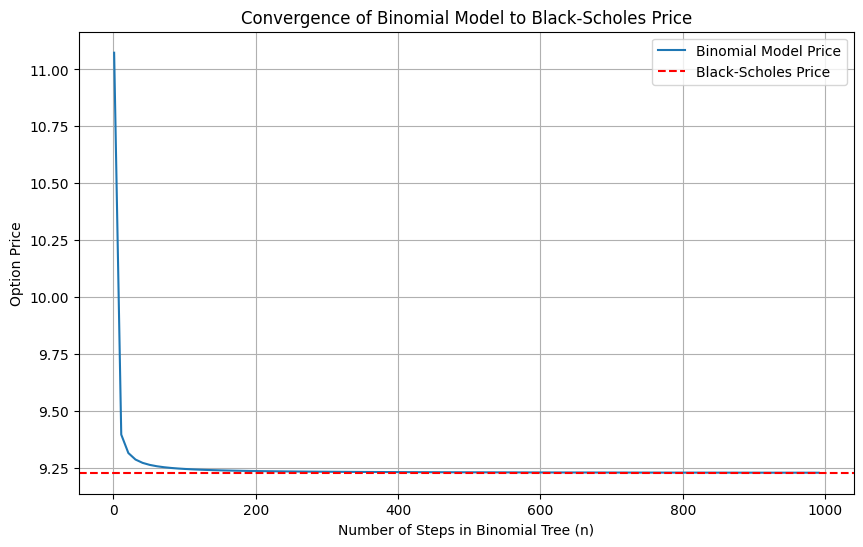

In [ ]:
# Option parameters
S0 = 100  # Initial stock price
K = 100  # Strike price
T = 1.0  # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
q = 0.02  # Dividend Yield
option_type = 'call'

# Get Black-Scholes price
bsm_pricer = BlackScholesOptionPricer(S0, K, T, r, sigma, q)
bsm_price = bsm_pricer.price_european_call()

# Compute binomial prices for increasing n
n_values = list(range(1, 1001, 10))
pricer = BinomialOptionPricer(S0, K, T, r, sigma, q, n)
binomial_prices = pricer.convergence_analysis(n_values)

plt.figure(figsize=(10, 6))
plt.plot(binomial_prices['steps'], binomial_prices['price'], label='Binomial Model Price')
plt.axhline(y=bsm_price['option_price'], color='red', linestyle='--', label='Black-Scholes Price')
plt.xlabel('Number of Steps in Binomial Tree (n)')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Model to Black-Scholes Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def plot_sensitivity(parameter_name: str, df: pd.DataFrame):
    plt.figure(figsize=(8, 5))
    plt.plot(df[parameter_name], df['option_price'], marker='o', linestyle='-', color='skyblue')
    plt.xlabel(parameter_name, fontsize=12)
    plt.ylabel('Option Price', fontsize=12)
    plt.title(f'Sensitivity of Option Price to {parameter_name}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



Sensitivity Analysis - Stock Price Impact:
--------------------------------------------------
      S0  option_price
 90.0000        4.3531
 92.0000        5.1991
 94.0000        6.0450
 96.0000        7.0560
 98.0000        8.1221
100.0000        9.1882
102.0000       10.4677
104.0000       11.7471
106.0000       13.0437
108.0000       14.5143
110.0000       15.9848


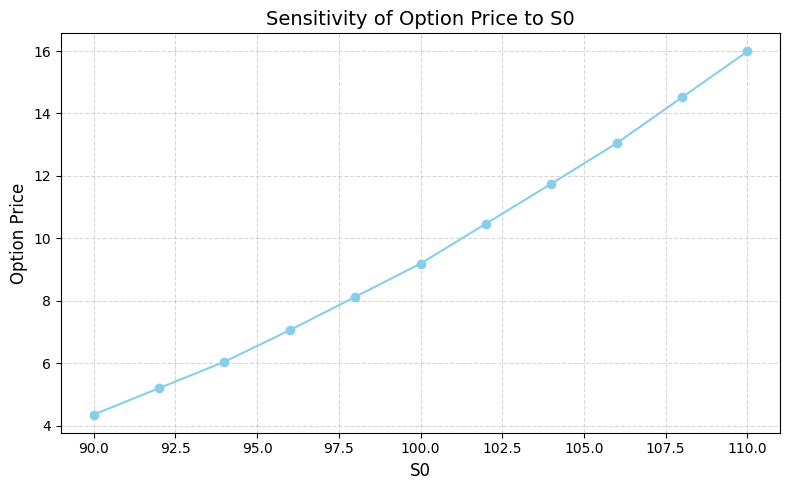



Sensitivity Analysis - Volatility Impact:
--------------------------------------------------
 sigma  option_price
0.1800        8.4346
0.1840        8.5852
0.1880        8.7359
0.1920        8.8866
0.1960        9.0374
0.2000        9.1882
0.2040        9.3391
0.2080        9.4900
0.2120        9.6409
0.2160        9.7919
0.2200        9.9428


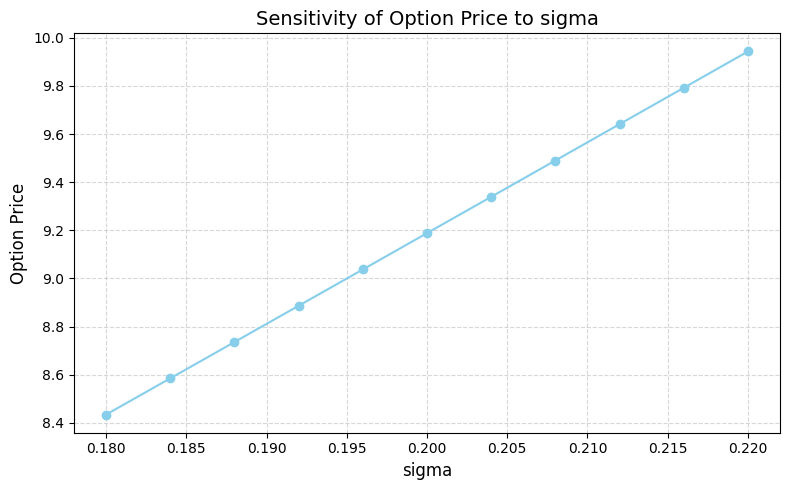



Sensitivity Analysis - Time to Expiration Impact:
--------------------------------------------------
     T  option_price
0.9000        8.6695
0.9200        8.7752
0.9400        8.8798
0.9600        8.9836
0.9800        9.0864
1.0000        9.1882
1.0200        9.2892
1.0400        9.3893
1.0600        9.4886
1.0800        9.5870
1.1000        9.6847


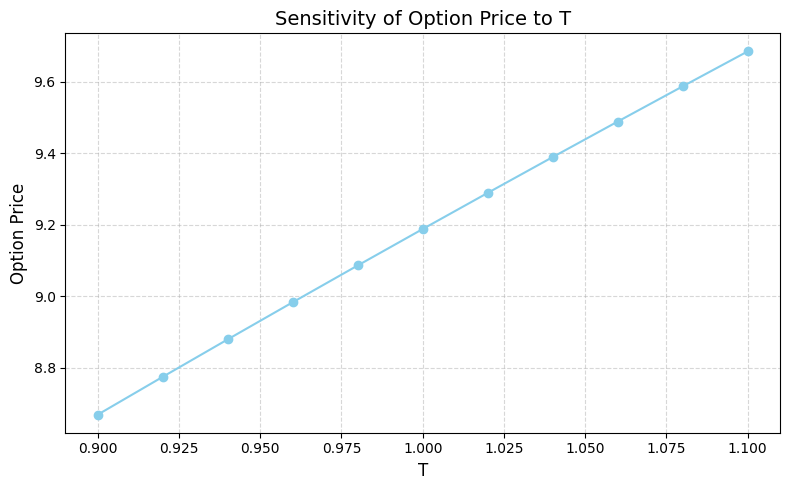



Sensitivity Analysis - Risk-free rate Impact:
--------------------------------------------------
     r  option_price
0.0450        8.9427
0.0460        8.9915
0.0470        9.0405
0.0480        9.0896
0.0490        9.1388
0.0500        9.1882
0.0510        9.2377
0.0520        9.2874
0.0530        9.3372
0.0540        9.3871
0.0550        9.4372


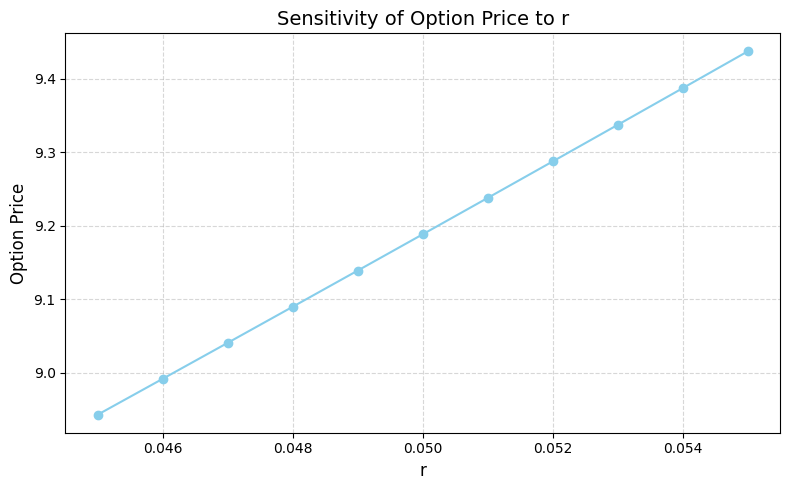



Sensitivity Analysis - Strike Price Impact:
--------------------------------------------------
       K  option_price
 90.0000       15.1216
 92.0000       13.8237
 94.0000       12.5258
 96.0000       11.3796
 98.0000       10.2839
100.0000        9.1882
102.0000        8.3059
104.0000        7.4236
106.0000        6.5600
108.0000        5.8857
110.0000        5.2114


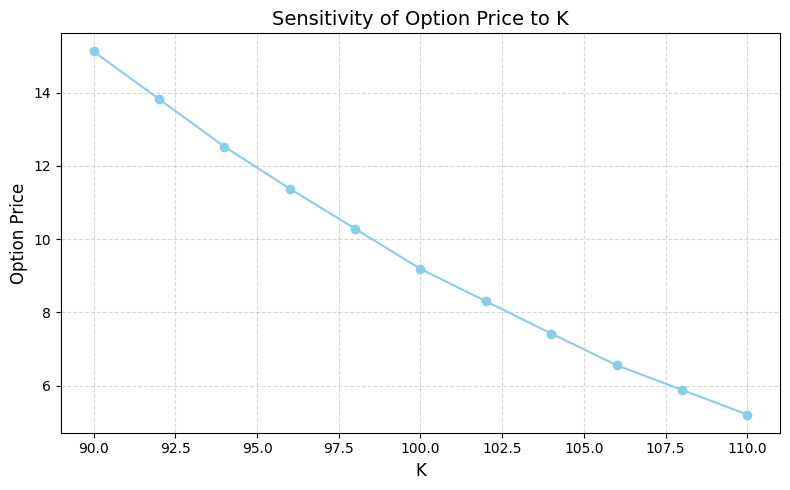

In [ ]:
#Binomial Model Sensitivity Analysis
print(f"\n\nSensitivity Analysis - Stock Price Impact:")
print("-" * 50)
sensitivity_df = pricer.sensitivity_analysis('S0')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('S0', sensitivity_df)
print(f"\n\nSensitivity Analysis - Volatility Impact:")
print("-" * 50)
sensitivity_df = pricer.sensitivity_analysis('sigma')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('sigma', sensitivity_df)
print(f"\n\nSensitivity Analysis - Time to Expiration Impact:")
print("-" * 50)
sensitivity_df = pricer.sensitivity_analysis('T')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('T', sensitivity_df)
print(f"\n\nSensitivity Analysis - Risk-free rate Impact:")
print("-" * 50)
sensitivity_df = pricer.sensitivity_analysis('r')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('r', sensitivity_df)
print(f"\n\nSensitivity Analysis - Strike Price Impact:")
print("-" * 50)
sensitivity_df = pricer.sensitivity_analysis('K')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('K', sensitivity_df)



Sensitivity Analysis - Stock Price Impact:
--------------------------------------------------
      S0  option_price
 90.0000        0.3044
 92.0000        0.4958
 94.0000        0.7716
 96.0000        1.1516
 98.0000        1.6542
100.0000        2.2945
102.0000        3.0830
104.0000        4.0246
106.0000        5.1183
108.0000        6.3579
110.0000        7.7325


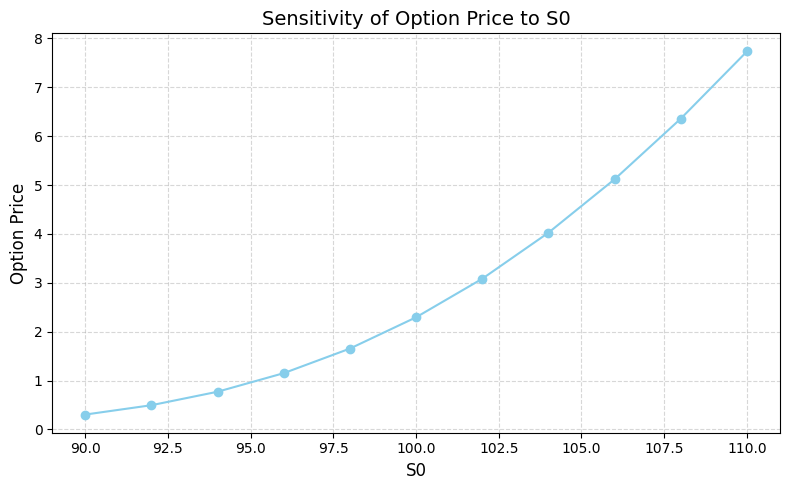



Sensitivity Analysis - Volatility Impact:
--------------------------------------------------
 sigma  option_price
0.1800        1.9263
0.1840        1.9993
0.1880        2.0727
0.1920        2.1463
0.1960        2.2203
0.2000        2.2945
0.2040        2.3689
0.2080        2.4436
0.2120        2.5185
0.2160        2.5937
0.2200        2.6690


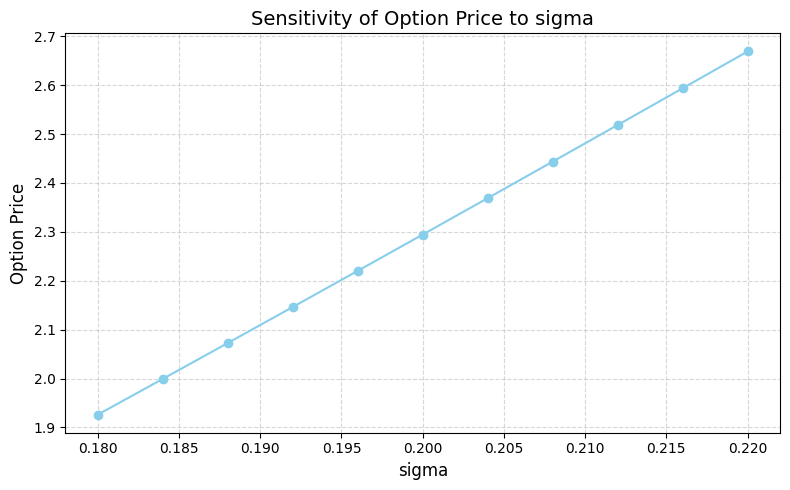



Sensitivity Analysis - Time to Expiration Impact:
--------------------------------------------------
     T  option_price
0.2250        2.0813
0.2300        2.1245
0.2350        2.1674
0.2400        2.2101
0.2450        2.2524
0.2500        2.2945
0.2550        2.3363
0.2600        2.3778
0.2650        2.4191
0.2700        2.4602
0.2750        2.5009


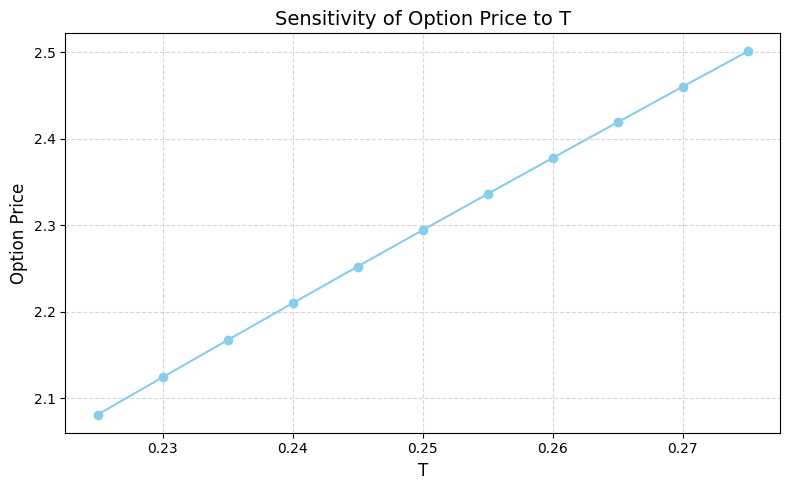



Sensitivity Analysis - Risk-free rate Impact:
--------------------------------------------------
     r  option_price
0.0450        2.2531
0.0460        2.2613
0.0470        2.2696
0.0480        2.2779
0.0490        2.2862
0.0500        2.2945
0.0510        2.3028
0.0520        2.3112
0.0530        2.3196
0.0540        2.3280
0.0550        2.3365


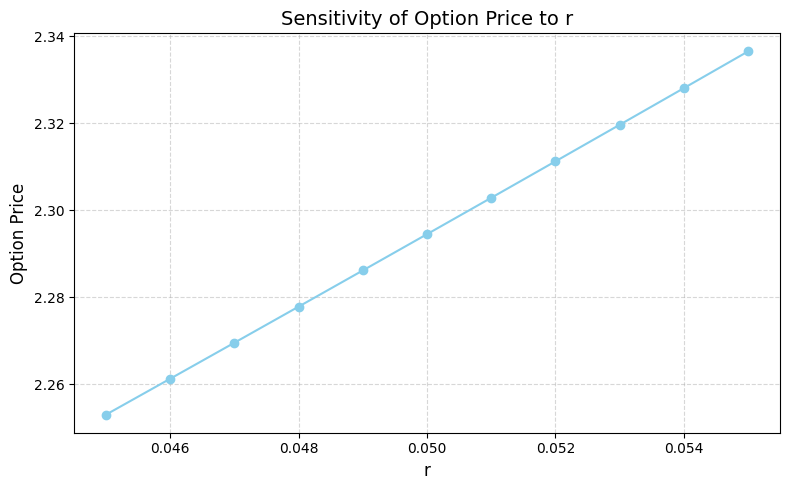



Sensitivity Analysis - Strike Price Impact:
--------------------------------------------------
       K  option_price
 94.5000        7.6946
 96.6000        6.2756
 98.7000        5.0240
100.8000        3.9455
102.9000        3.0387
105.0000        2.2945
107.1000        1.6987
109.2000        1.2331
111.3000        0.8780
113.4000        0.6133
115.5000        0.4205


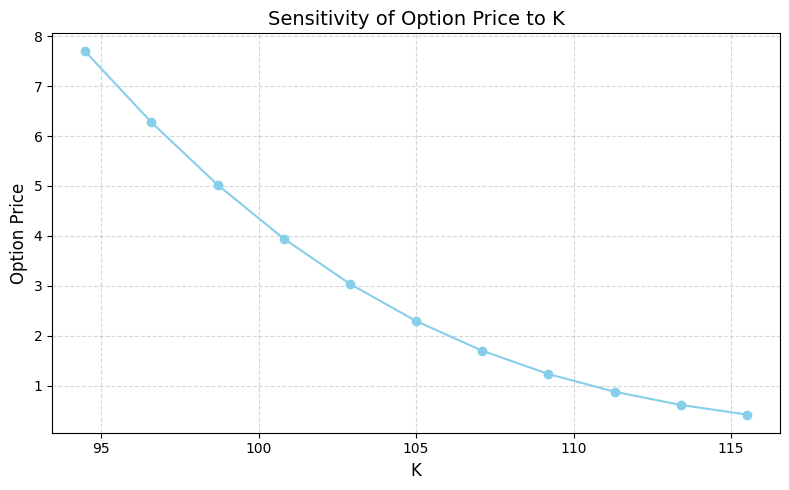

In [ ]:
# Black-Scholes Model sensitivity analysis
print(f"\n\nSensitivity Analysis - Stock Price Impact:")
print("-" * 50)
sensitivity_df = bs_pricer.sensitivity_analysis('S0')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('S0', sensitivity_df)
print(f"\n\nSensitivity Analysis - Volatility Impact:")
print("-" * 50)
sensitivity_df = bs_pricer.sensitivity_analysis('sigma')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('sigma', sensitivity_df)
print(f"\n\nSensitivity Analysis - Time to Expiration Impact:")
print("-" * 50)
sensitivity_df = bs_pricer.sensitivity_analysis('T')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('T', sensitivity_df)
print(f"\n\nSensitivity Analysis - Risk-free rate Impact:")
print("-" * 50)
sensitivity_df = bs_pricer.sensitivity_analysis('r')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('r', sensitivity_df)
print(f"\n\nSensitivity Analysis - Strike Price Impact:")
print("-" * 50)
sensitivity_df = bs_pricer.sensitivity_analysis('K')
print(sensitivity_df.to_string(index=False, float_format='%.4f'))
plot_sensitivity('K', sensitivity_df)

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,10.24,0.197640,11.110390,11.112103
1,588.0,10.00,0.191048,10.198426,10.198484
2,589.0,9.42,0.185433,9.313768,9.315790
3,590.0,8.30,0.179085,8.433587,8.432721
4,591.0,7.34,0.172372,7.564738,7.567840
5,592.0,6.77,0.165780,6.718163,6.715258
6,593.0,6.14,0.159432,5.900254,5.902407
7,594.0,5.31,0.153329,5.116061,5.119641
8,595.0,4.67,0.147164,4.364914,4.366321
9,596.0,4.00,0.141183,3.657678,3.655963


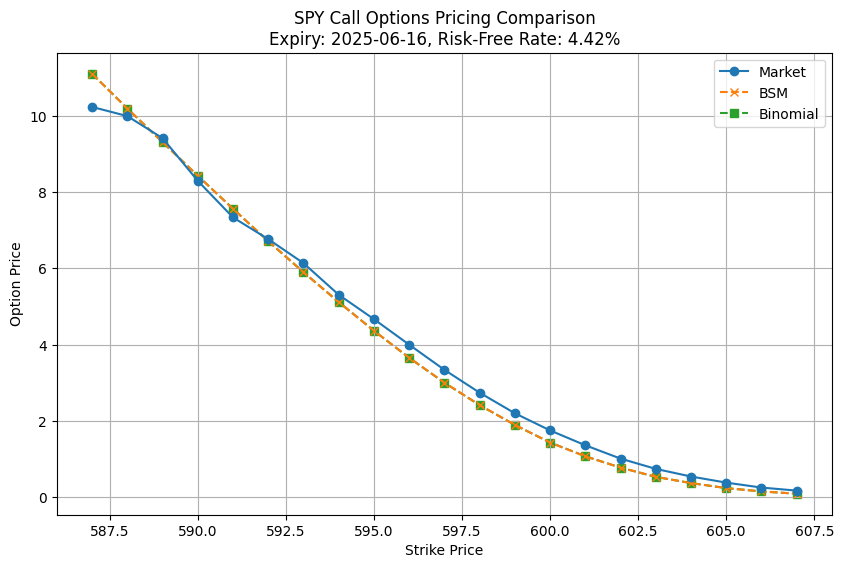

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,11.01,0.213936,12.399969,12.401650
1,588.0,10.80,0.209542,11.560076,11.564528
2,589.0,10.59,0.204598,10.722013,10.716168
3,590.0,10.17,0.200264,9.913958,9.919400
4,591.0,8.41,0.195992,9.125285,9.123696
5,592.0,7.77,0.191781,8.357881,8.362725
6,593.0,7.30,0.187569,7.612147,7.612573
7,594.0,6.91,0.182564,6.868756,6.873461
8,595.0,6.35,0.178475,6.175486,6.175054
9,596.0,5.73,0.174203,5.505399,5.511109


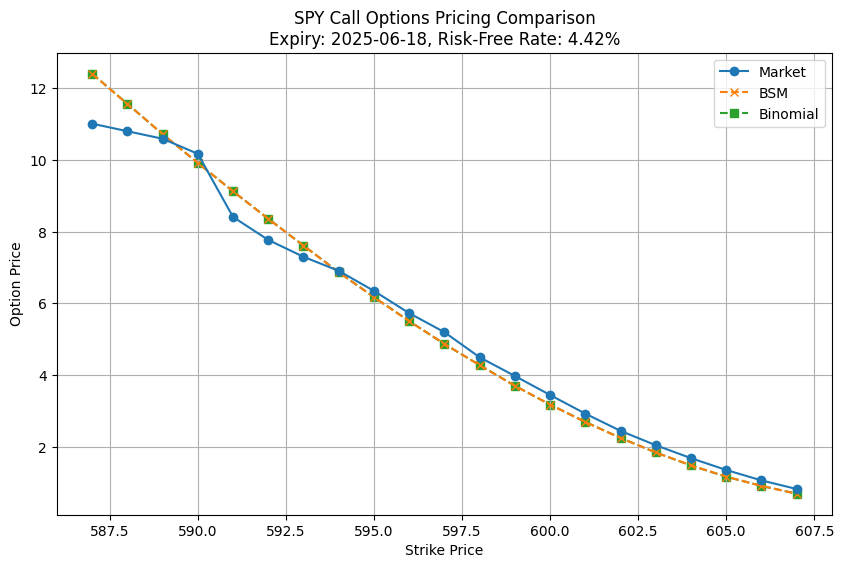

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,10.70,0.165292,10.911317,10.906338
1,595.0,6.76,0.150155,7.249578,7.244794
2,600.0,4.15,0.136392,4.238509,4.244726
3,605.0,2.09,0.124032,2.059440,2.063482


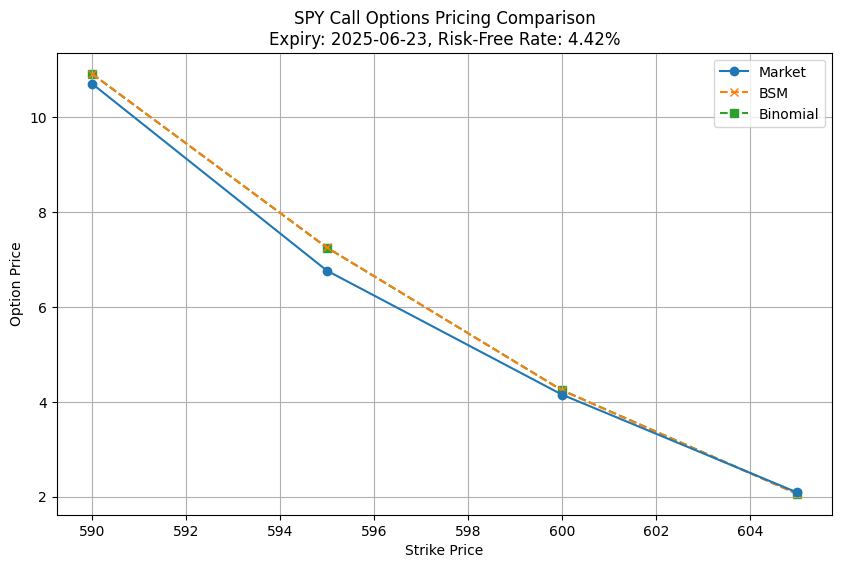

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,15.42,0.171151,15.202230,15.205702
1,588.0,13.46,0.169015,14.429569,14.423469
2,589.0,12.99,0.166817,13.666829,13.674540
3,590.0,12.16,0.164559,12.914563,12.922188
4,591.0,11.40,0.162392,12.180745,12.173607
5,592.0,10.70,0.160348,11.467849,11.473854
6,593.0,9.77,0.158151,10.763255,10.772049
7,594.0,9.40,0.156045,10.079756,10.074169
8,595.0,9.00,0.153970,9.415225,9.421419
9,596.0,8.11,0.151742,8.761184,8.769357


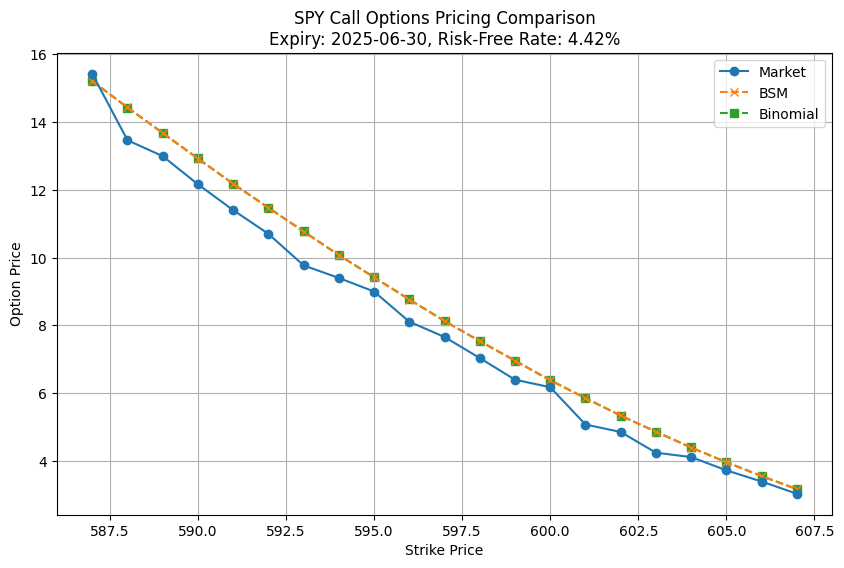

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,17.77,0.186928,18.755591,18.765055
1,588.0,16.92,0.184731,17.992562,17.988137
2,589.0,16.39,0.182534,17.238955,17.235977
3,590.0,15.49,0.180337,16.495189,16.505986
4,591.0,14.43,0.178292,15.771366,15.785003
5,592.0,14.27,0.174996,14.978495,14.983954
6,593.0,13.54,0.173043,14.282179,14.269072
7,594.0,12.87,0.170937,13.587917,13.594730
8,595.0,12.07,0.168923,12.911911,12.925646
9,596.0,10.90,0.167001,12.254742,12.261848


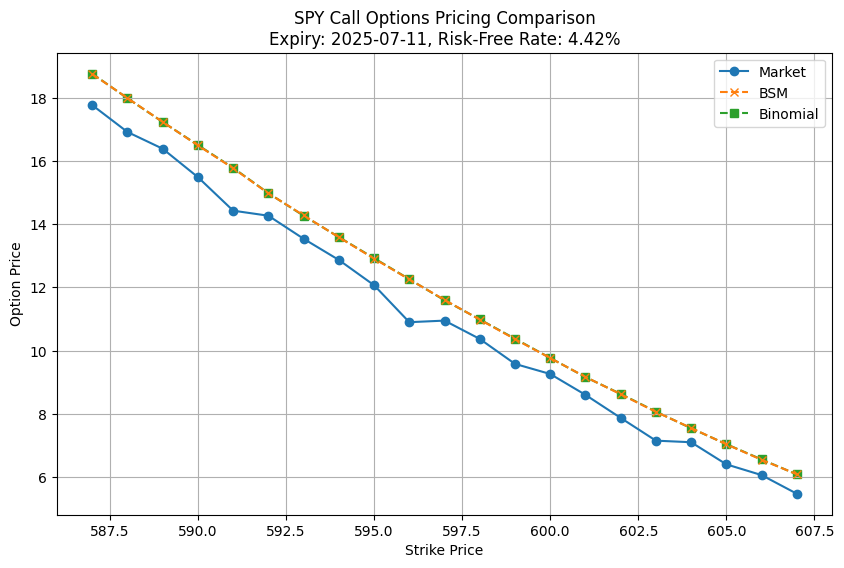

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,25.20,0.193734,22.289935,22.293345
1,588.0,19.84,0.191750,21.535605,21.550476
2,589.0,22.97,0.189766,20.788883,20.806938
3,590.0,20.75,0.187813,20.052415,20.065079
4,591.0,18.14,0.185891,19.326535,19.324901
5,592.0,19.58,0.183480,18.570785,18.558814
6,592.5,17.05,0.182595,18.221302,18.220250
7,593.0,19.83,0.181679,17.871688,17.879094
8,594.0,16.88,0.179787,17.174560,17.191396
9,595.0,15.14,0.177880,16.485695,16.501741


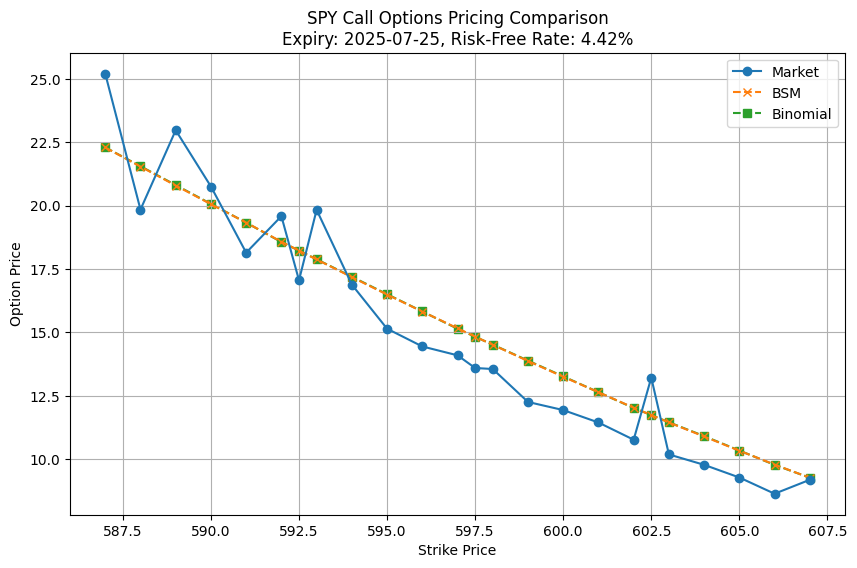

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,23.05,0.199135,25.028244,25.005894
1,595.0,19.66,0.190560,21.478941,21.494562
2,600.0,16.46,0.182335,18.147531,18.169601
3,605.0,13.36,0.174508,15.065049,15.078922


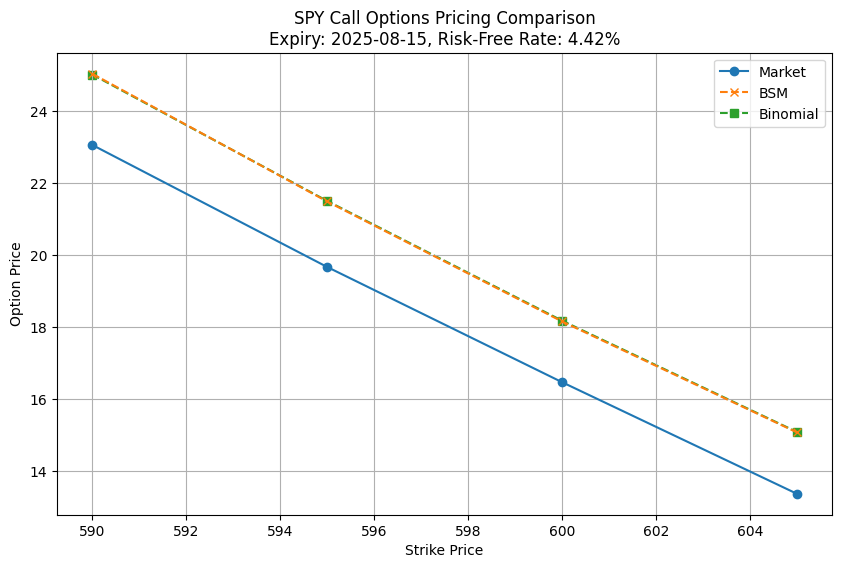

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,28.71,0.212929,32.361344,32.376494
1,595.0,24.94,0.207878,29.097724,29.109212
2,600.0,22.31,0.194161,24.910290,24.934530
3,605.0,19.24,0.185097,21.434957,21.409938


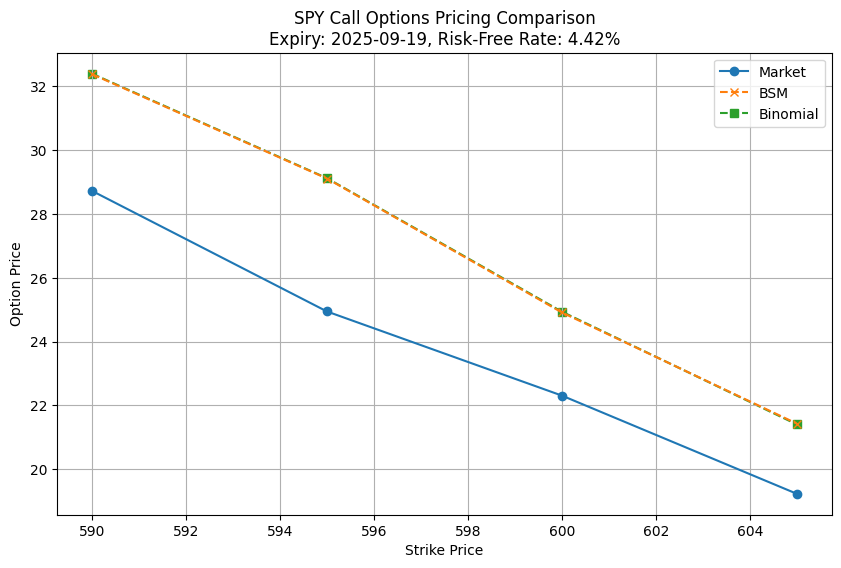

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,32.08,0.212136,36.412969,36.440546
1,595.0,28.62,0.205178,32.825475,32.834352
2,600.0,25.62,0.196175,29.068120,29.091617
3,605.0,22.16,0.188530,25.622197,25.622085


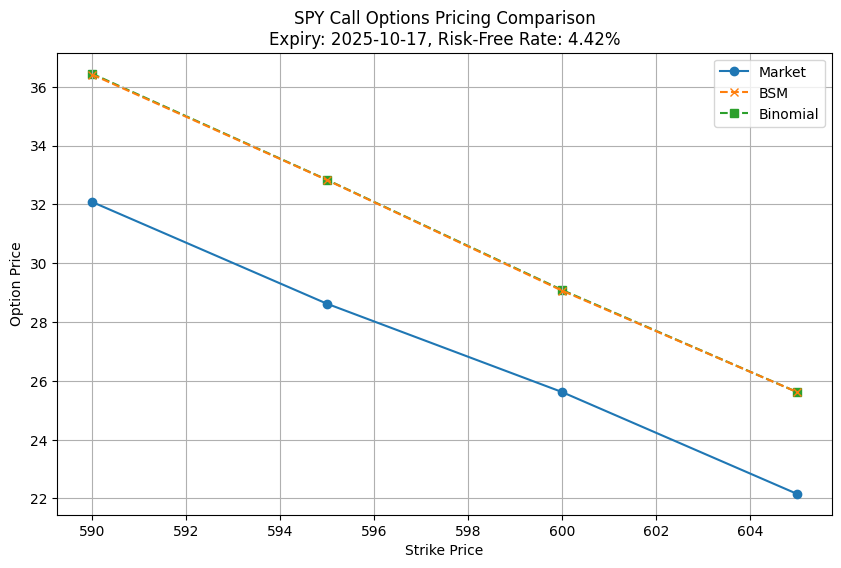

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,37.31,0.226845,45.845264,45.862251
1,588.0,38.15,0.227036,45.336734,45.366872
2,589.0,42.19,0.223885,44.313921,44.351482
3,590.0,39.55,0.221840,43.464922,43.506792
4,591.0,38.80,0.223084,43.131672,43.174535
5,592.0,34.32,0.220558,42.214137,42.253159
6,593.0,37.10,0.219254,41.490462,41.521688
7,594.0,34.71,0.215508,40.386471,40.405939
8,595.0,34.21,0.219612,40.521044,40.523505
9,596.0,35.58,0.216622,39.542605,39.524636


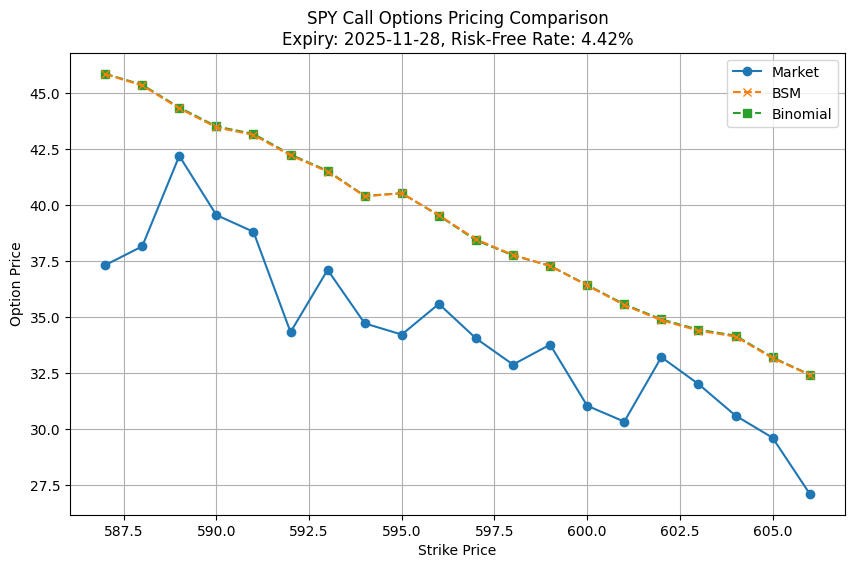

In [ ]:
ticker = 'SPY'
stock = yf.Ticker(ticker)

# Retrieve current 10-year US Treasury yield (as %)
yield_ticker = "^TNX"
yield_history = yf.Ticker(yield_ticker).history(period="1d")
latest_yield_pct = yield_history['Close'].iloc[-1]  # e.g., 35.5 = 3.55%
r = latest_yield_pct / 100
for i in range(1, 21, 2):
    try:
        expirations = stock.options
        chosen_expiry = expirations[i]
        opt_chain = stock.option_chain(chosen_expiry).calls

        # Current stock price & time to expiry
        S0 = stock.history(period="1d")['Close'].iloc[-1]
        expiry_date = datetime.strptime(chosen_expiry, "%Y-%m-%d").date()
        T = (expiry_date - date.today()).days / 365.25
        # Focus on near-the-money options (±$10 of S)
        atm_options = opt_chain[abs(opt_chain['strike'] - S0) <= 10].copy()

        # Drop options with missing implied volatilities or prices
        atm_options = atm_options.dropna(subset=['impliedVolatility', 'lastPrice'])

        # Dividend Yield
        q = stock.info.get('dividendYield', 0) / 100

        results = []
        for _, row in atm_options.iterrows():
            K = row['strike']
            sigma = row['impliedVolatility']
            market_price = row['lastPrice']
            bsm_price = BlackScholesOptionPricer(S0, K, T, r, sigma, q)
            bin_price = BinomialOptionPricer(S0, K, T, r, sigma, q, 200)
            results.append({
                "Strike": K,
                "Market Price": market_price,
                "Implied Vol": sigma,
                "Black-Scholes": bsm_price.price_european_call()['option_price'],
                "Binomial": bin_price.price_european_option('call')['option_price']
            })

        df_comparison = pd.DataFrame(results).sort_values(by="Strike")

        # --- Display Results ---
        display(df_comparison)

        # --- Plot Results ---
        plt.figure(figsize=(10, 6))
        plt.plot(df_comparison['Strike'], df_comparison['Market Price'], 'o-', label='Market', zorder=3)
        plt.plot(df_comparison['Strike'], df_comparison['Black-Scholes'], 'x--', label='BSM', zorder=2)
        plt.plot(df_comparison['Strike'], df_comparison['Binomial'], 's--', label='Binomial', zorder=1)
        plt.xlabel("Strike Price")
        plt.ylabel("Option Price")
        plt.title(f"{ticker} Call Options Pricing Comparison\nExpiry: {chosen_expiry}, Risk-Free Rate: {r * 100:.2f}%")
        plt.grid(True)
        plt.legend()
        plt.show()
    except:
        pass


,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,515.0,82.19,0.715823,82.266682,82.263974
1,535.0,62.01,0.558598,62.286692,62.285478
2,540.0,56.46,0.516118,57.285854,57.283920
3,545.0,58.02,0.628178,52.883521,52.882804
4,550.0,46.32,0.572514,47.855230,47.852150
5,554.0,44.82,0.540776,43.911610,43.910017
6,555.0,37.50,0.535893,42.947428,42.948179
7,556.0,43.11,0.524175,41.938486,41.939439
8,558.0,39.29,0.495855,39.887394,39.888017
9,559.0,39.11,0.486089,38.891172,38.892213


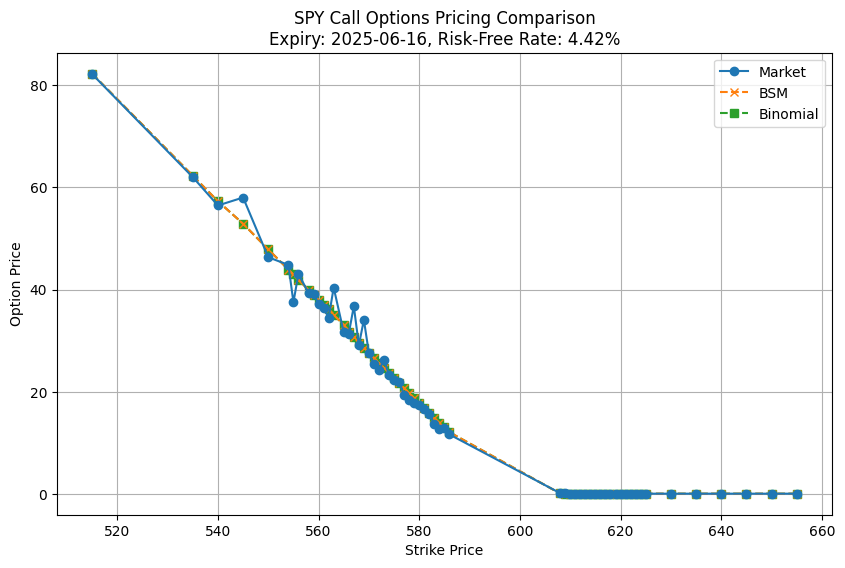

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,525.0,74.83,0.585942,72.664181,72.661869
1,530.0,70.50,0.552495,67.680845,67.674377
2,540.0,60.94,0.580937,58.403159,58.404648
3,550.0,46.80,0.452154,48.010400,48.003818
4,555.0,46.89,0.464727,43.517117,43.519639
5,557.0,43.21,0.448736,41.532252,41.533409
6,560.0,36.56,0.426764,38.581507,38.574557
7,562.0,39.34,0.409674,36.588536,36.583264
8,563.0,36.69,0.401861,35.601579,35.599866
9,565.0,31.94,0.341803,33.116031,33.115859


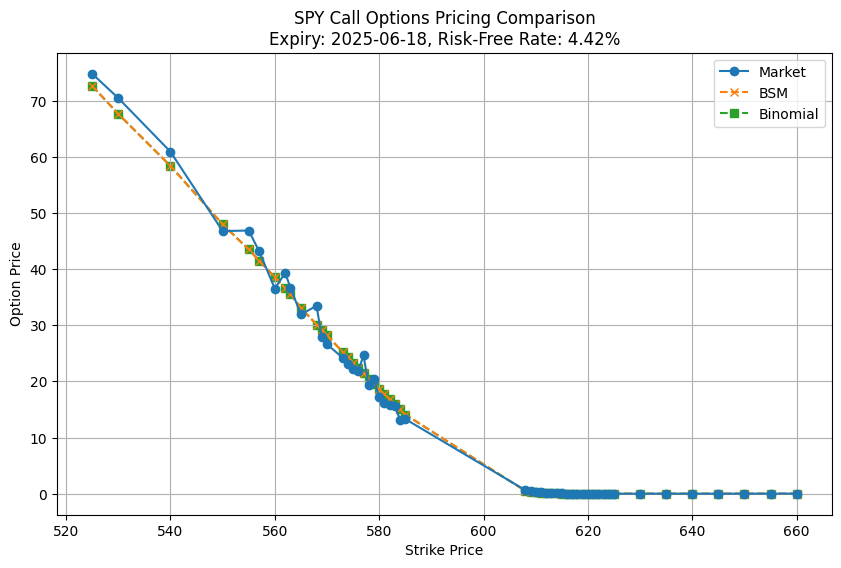

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,565.0,38.62,0.333503,35.081875,35.073335
1,575.0,26.77,0.234139,24.417152,24.415333
2,580.0,22.15,0.216866,19.910721,19.914639
3,585.0,15.46,0.187142,15.193640,15.198947
4,610.0,0.81,0.113168,0.769558,0.767772
5,615.0,0.22,0.104135,0.203746,0.202615
6,620.0,0.05,0.101083,0.048635,0.047471
7,625.0,0.02,0.104501,0.015457,0.015130
8,630.0,0.01,0.120126,0.014585,0.014122
9,635.0,0.01,0.126962,0.007110,0.006872


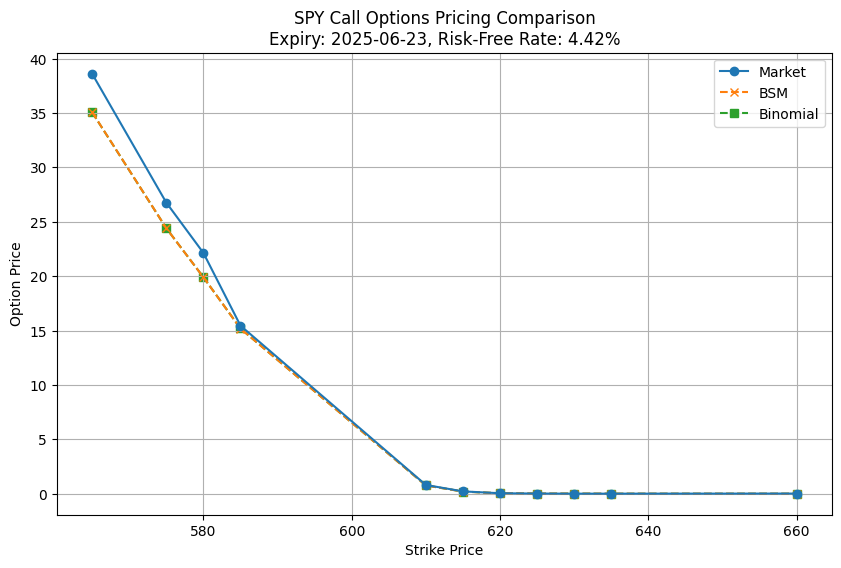

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,465.0,122.07,0.585820,135.213700,135.201394
1,480.0,117.40,0.533696,120.418147,120.421232
2,490.0,107.20,0.441290,109.508340,109.509096
3,500.0,97.53,0.463384,100.693630,100.691506
4,505.0,97.65,0.399420,94.790904,94.790745
5,510.0,90.50,0.385443,89.897489,89.899810
6,515.0,86.93,0.368415,84.948520,84.946027
7,520.0,80.73,0.399359,81.179001,81.174454
8,525.0,72.78,0.384345,76.350433,76.357759
9,530.0,73.91,0.367621,71.484701,71.486053


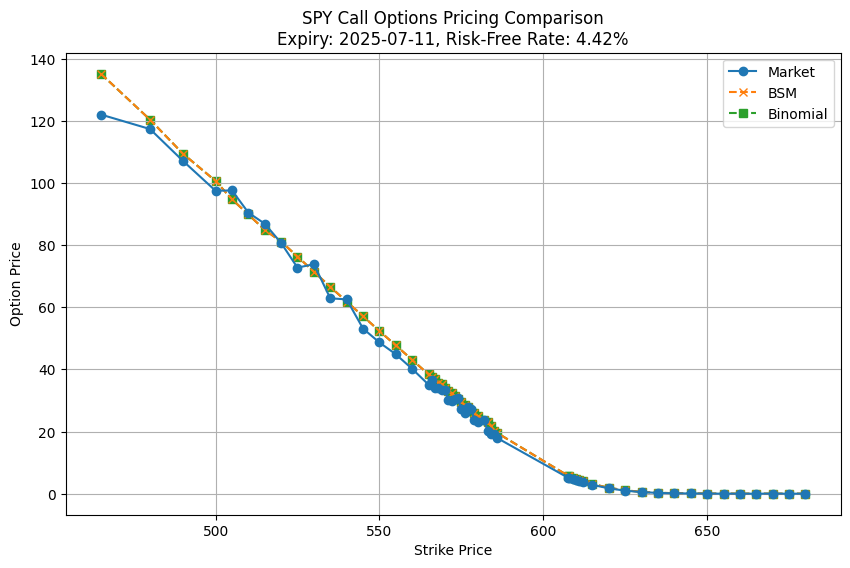

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,480.0,122.98,0.476018,121.939683,121.946322
1,490.0,111.11,0.447698,112.179132,112.173783
2,510.0,93.08,0.393011,92.783827,92.790157
3,535.0,72.26,0.326789,68.858326,68.834741
4,540.0,62.87,0.314521,64.173135,64.183660
5,545.0,60.03,0.306709,59.742563,59.742363
6,550.0,55.13,0.290657,54.933763,54.926877
7,555.0,50.14,0.277565,50.311450,50.327139
8,560.0,45.25,0.270301,46.076983,46.063948
9,565.0,37.87,0.252968,41.306552,41.323591


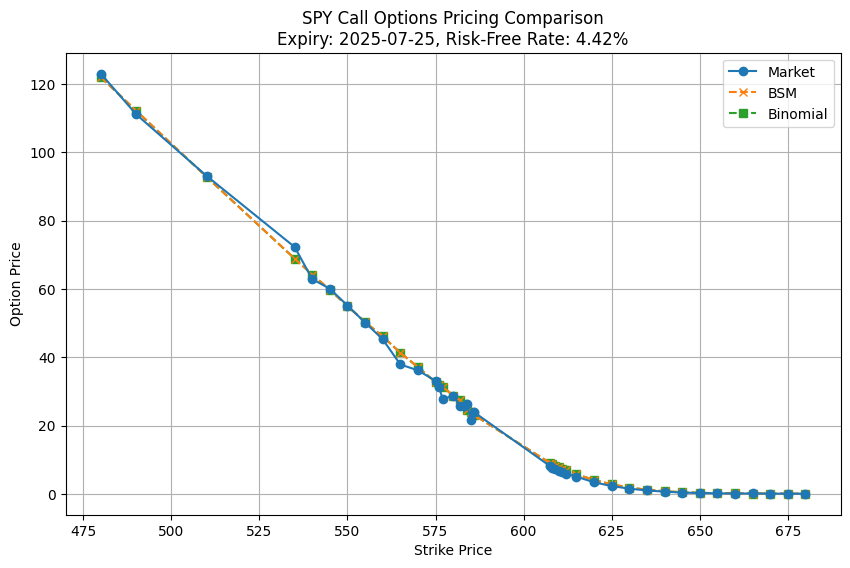

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,330.0,272.08,0.616093,272.609650,272.611474
1,350.0,251.28,0.578007,253.302124,253.281450
2,355.0,242.99,0.568242,248.468172,248.432425
3,400.0,195.23,0.521184,206.653848,206.651054
4,405.0,182.51,0.511205,201.851259,201.832665
5,445.0,161.18,0.434484,163.597191,163.582041
6,455.0,138.61,0.416937,154.145290,154.136112
7,460.0,150.18,0.408331,149.436986,149.449641
8,470.0,129.98,0.391226,140.045516,140.061479
9,480.0,126.09,0.376380,130.844657,130.806899


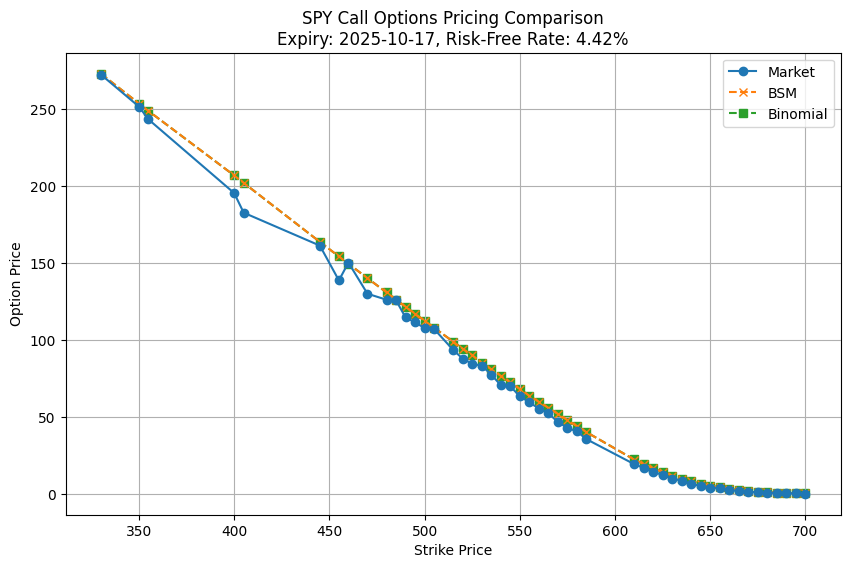

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,410.0,194.58,0.475225,200.490018,200.490184
1,450.0,150.18,0.412253,163.222005,163.208527
2,470.0,140.09,0.382086,144.815935,144.846700
3,500.0,113.47,0.340094,117.809710,117.843913
4,510.0,104.66,0.324180,108.722365,108.693010
5,520.0,94.86,0.313102,100.240578,100.277085
6,524.0,91.29,0.308845,96.902811,96.939104
7,525.0,90.68,0.307624,96.053426,96.085552
8,536.0,81.31,0.292243,86.550582,86.549988
9,540.0,78.21,0.284935,82.911985,82.943893


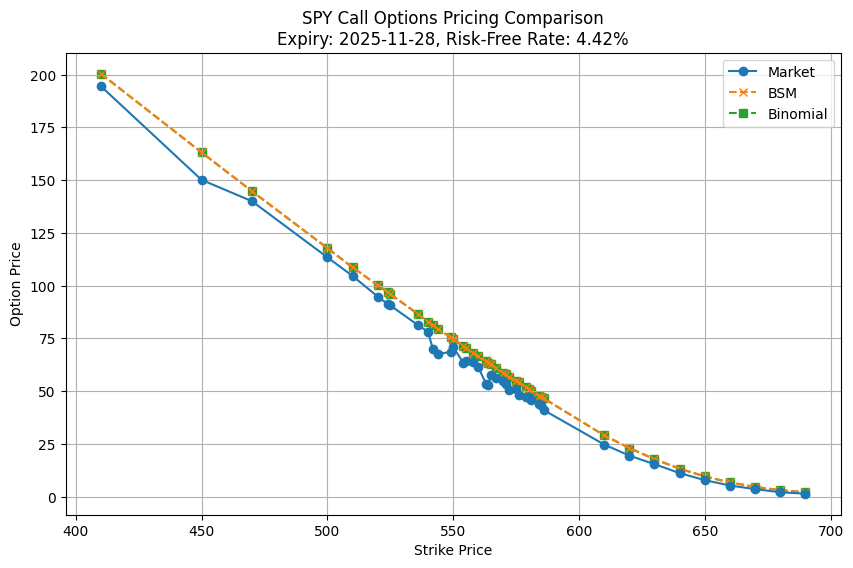

In [ ]:
ticker = 'SPY'
stock = yf.Ticker(ticker)

# Retrieve current 10-year US Treasury yield (as %)
yield_ticker = "^TNX"
yield_history = yf.Ticker(yield_ticker).history(period="1d")
latest_yield_pct = yield_history['Close'].iloc[-1]  # e.g., 35.5 = 3.55%
r = latest_yield_pct / 100
for i in range(1, 21, 2):
    try:
        expirations = stock.options
        chosen_expiry = expirations[i]
        opt_chain = stock.option_chain(chosen_expiry).calls

        # Current stock price & time to expiry
        S0 = stock.history(period="1d")['Close'].iloc[-1]
        expiry_date = datetime.strptime(chosen_expiry, "%Y-%m-%d").date()
        T = (expiry_date - date.today()).days / 365.25
        # Focus on near-the-money options (±$10 of S)
        otm_options = opt_chain[abs(opt_chain['strike'] - S0) > 10].copy()

        # Drop options with missing implied volatilities or prices
        otm_options = otm_options.dropna(subset=['impliedVolatility', 'lastPrice'])

        # Dividend Yield
        q = stock.info.get('dividendYield', 0) / 100

        results = []
        for _, row in otm_options.iterrows():
            K = row['strike']
            sigma = row['impliedVolatility']
            market_price = row['lastPrice']
            bsm_price = BlackScholesOptionPricer(S0, K, T, r, sigma, q)
            bin_price = BinomialOptionPricer(S0, K, T, r, sigma, q, 200)
            results.append({
                "Strike": K,
                "Market Price": market_price,
                "Implied Vol": sigma,
                "Black-Scholes": bsm_price.price_european_call()['option_price'],
                "Binomial": bin_price.price_european_option('call')['option_price']
            })

        df_comparison = pd.DataFrame(results).sort_values(by="Strike")

        # --- Display Results ---
        display(df_comparison)

        # --- Plot Results ---
        plt.figure(figsize=(10, 6))
        plt.plot(df_comparison['Strike'], df_comparison['Market Price'], 'o-', label='Market', zorder=3)
        plt.plot(df_comparison['Strike'], df_comparison['Black-Scholes'], 'x--', label='BSM', zorder=2)
        plt.plot(df_comparison['Strike'], df_comparison['Binomial'], 's--', label='Binomial', zorder=1)
        plt.xlabel("Strike Price")
        plt.ylabel("Option Price")
        plt.title(f"{ticker} Call Options Pricing Comparison\nExpiry: {chosen_expiry}, Risk-Free Rate: {r * 100:.2f}%")
        plt.grid(True)
        plt.legend()
        plt.show()
    except:
        pass


,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,1.70,0.173531,1.312533,1.314248
1,588.0,1.93,0.171090,1.473901,1.480334
2,589.0,2.18,0.167855,1.637104,1.640824
3,590.0,2.30,0.164681,1.820711,1.828502
4,591.0,2.69,0.161507,2.025586,2.032947
5,592.0,2.71,0.158639,2.261557,2.269328
6,593.0,3.06,0.155221,2.509961,2.522212
7,594.0,3.29,0.151559,2.780004,2.784799
8,595.0,3.66,0.148263,3.090558,3.105754
9,596.0,4.05,0.144296,3.416512,3.433056


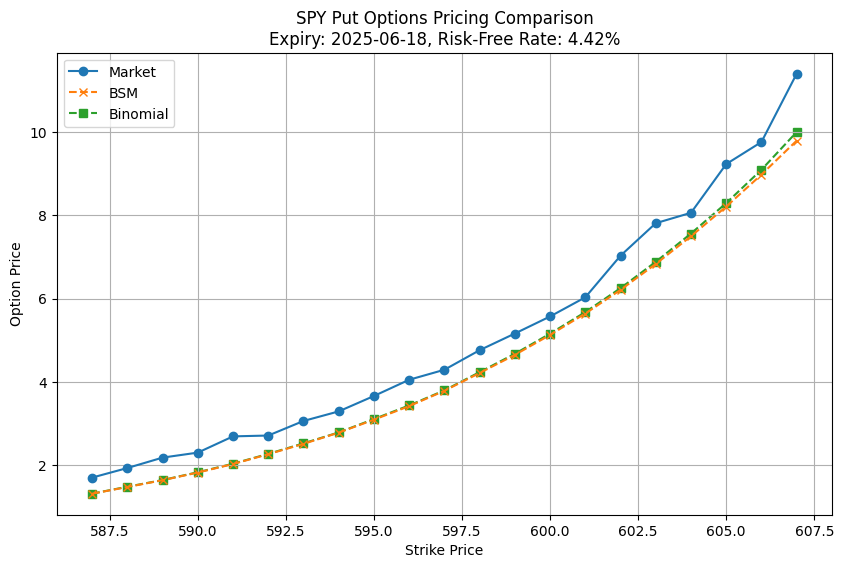

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,3.95,0.167672,3.478683,3.486832
1,595.0,5.64,0.157296,5.003916,5.028251
2,600.0,7.99,0.156136,7.478025,7.529956
3,605.0,11.05,0.157876,10.686512,10.765294


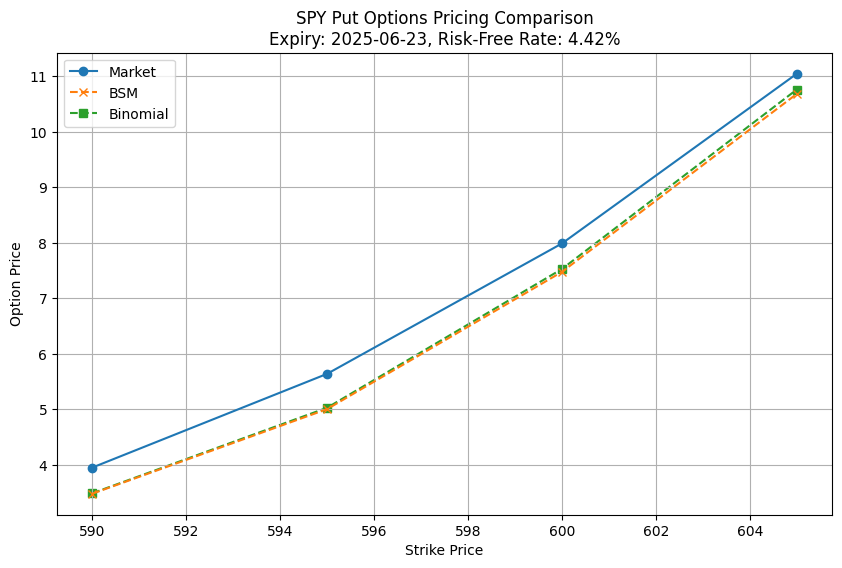

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,4.93,0.172494,4.391317,4.419107
1,588.0,5.25,0.170327,4.616419,4.640449
2,589.0,5.77,0.168282,4.859900,4.898389
3,590.0,5.71,0.166024,5.106776,5.146362
4,591.0,6.67,0.164437,5.400080,5.427349
5,592.0,6.82,0.162331,5.683572,5.729394
6,593.0,6.73,0.160348,5.988784,6.039292
7,594.0,7.58,0.158395,6.312090,6.351900
8,595.0,7.54,0.156503,6.655840,6.713131
9,596.0,8.18,0.154641,7.019296,7.082077


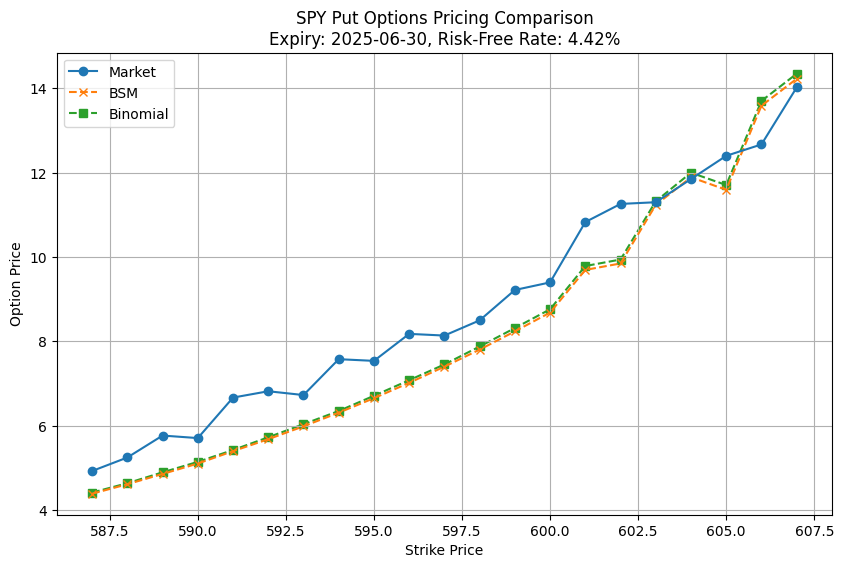

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,7.27,0.173836,6.529617,6.596252
1,588.0,7.47,0.171761,6.761121,6.825002
2,589.0,7.95,0.169839,7.012061,7.064088
3,590.0,8.20,0.167916,7.273706,7.344289
4,591.0,8.50,0.165963,7.544595,7.627238
5,592.0,8.87,0.164437,7.854291,7.937694
6,593.0,9.66,0.162545,8.153048,8.226202
7,594.0,9.75,0.160622,8.462481,8.552758
8,595.0,9.71,0.158791,8.791009,8.895197
9,596.0,10.00,0.156930,9.131264,9.236470


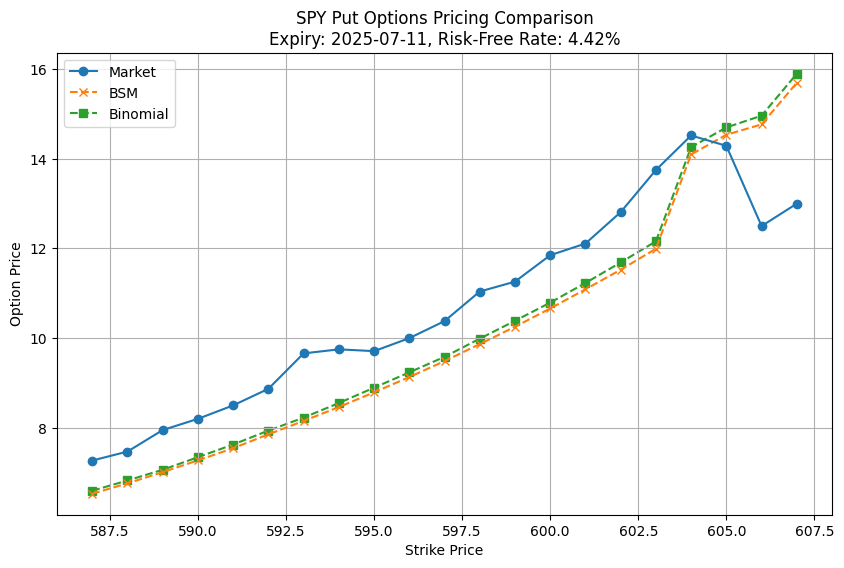

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,9.80,0.171685,8.477058,8.564116
1,587.5,10.14,0.170785,8.596047,8.686352
2,588.0,10.31,0.169839,8.713654,8.815813
3,589.0,10.88,0.168160,8.971496,9.091030
4,590.0,10.58,0.166451,9.235970,9.364101
5,591.0,11.33,0.164773,9.512086,9.640005
6,592.0,11.85,0.163079,9.796654,9.916066
7,592.5,11.25,0.162118,9.933672,10.053541
8,593.0,12.01,0.161263,10.081581,10.215257
9,594.0,12.09,0.159554,10.385186,10.538776


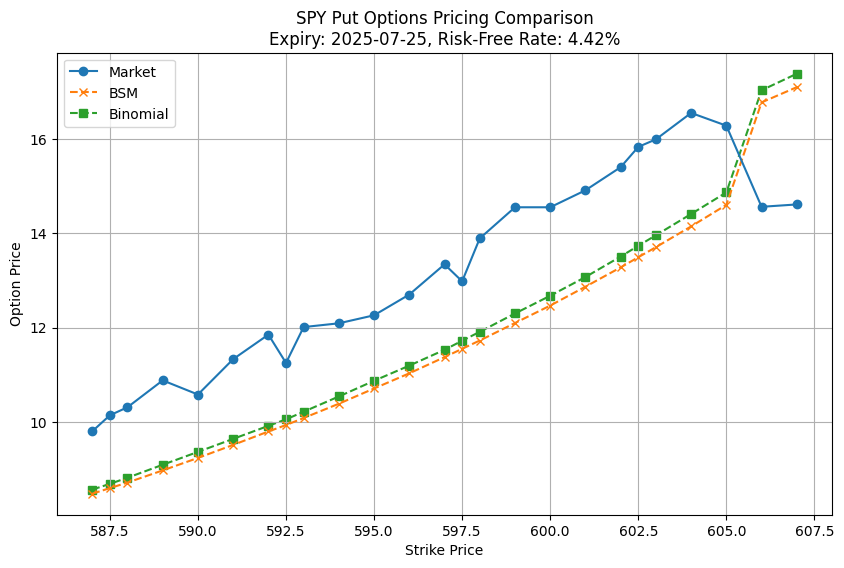

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,13.20,0.166238,11.654584,11.851894
1,595.0,14.85,0.158669,13.092492,13.348508
2,600.0,16.75,0.151238,14.764414,15.087641
3,605.0,19.76,0.143807,16.691323,17.101440


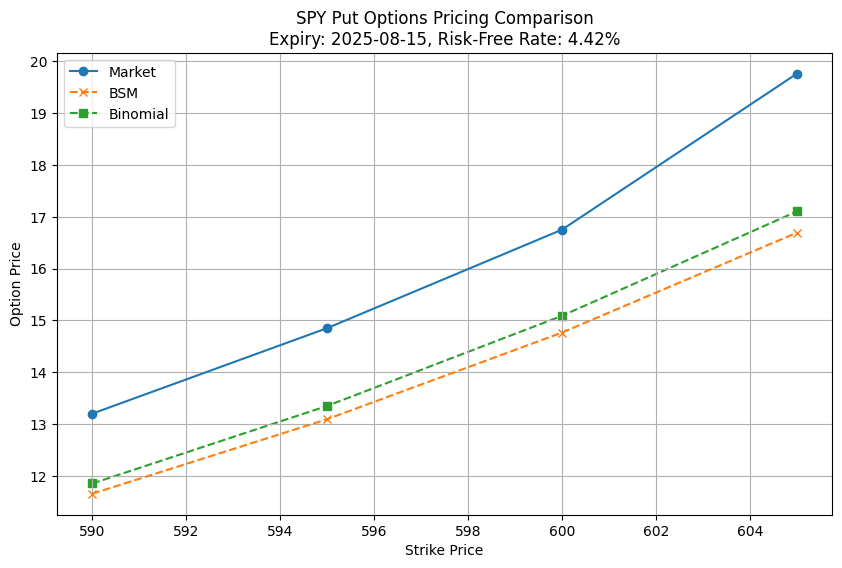

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,17.44,0.165704,14.718194,15.043782
1,595.0,19.02,0.158990,16.090898,16.511861
2,600.0,20.84,0.152276,17.633626,18.150289
3,605.0,22.73,0.145547,19.368137,19.989297


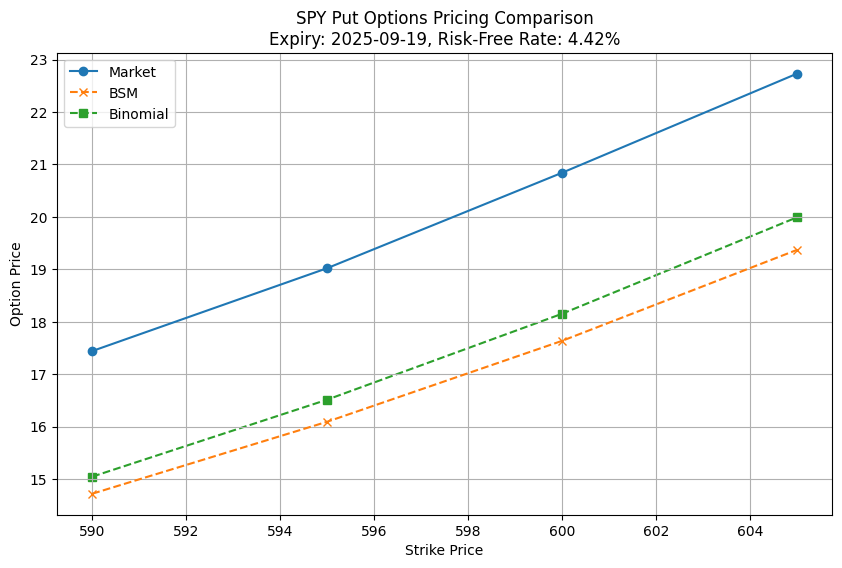

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,590.0,20.18,0.166695,16.848229,17.318643
1,595.0,22.08,0.160531,18.191200,18.751608
2,600.0,23.48,0.154260,19.664281,20.338932
3,605.0,24.26,0.147958,21.296068,22.074362


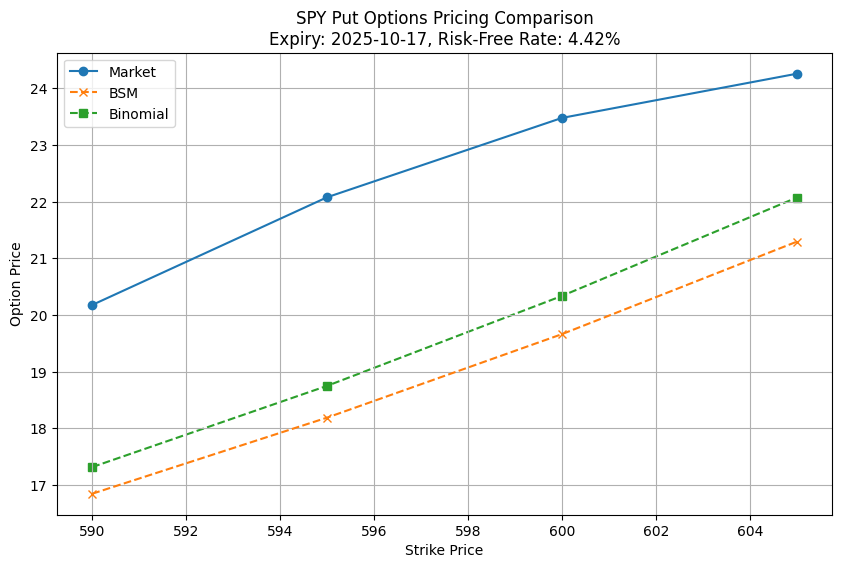

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,587.0,21.11,0.167718,18.270902,18.868214
1,588.0,20.56,0.166672,18.518307,19.137737
2,589.0,20.86,0.165597,18.765315,19.419668
3,590.0,23.46,0.164483,19.010783,19.695797
4,591.0,21.33,0.163399,19.265337,19.977076
5,592.0,22.44,0.162347,19.529129,20.263761
6,593.0,23.46,0.161263,19.792809,20.546543
7,594.0,22.30,0.160149,20.056424,20.825335
8,595.0,23.34,0.159058,20.328395,21.109406
9,596.0,25.80,0.157998,20.610061,21.400162


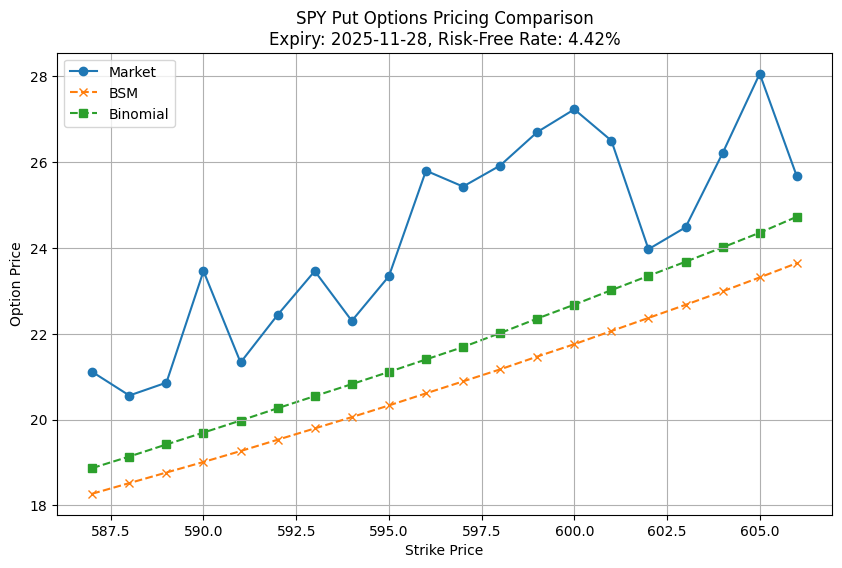

In [ ]:
ticker = 'SPY'
stock = yf.Ticker(ticker)

# Retrieve current 10-year US Treasury yield (as %)
yield_ticker = "^TNX"
yield_history = yf.Ticker(yield_ticker).history(period="1d")
latest_yield_pct = yield_history['Close'].iloc[-1]  # e.g., 35.5 = 3.55%
r = latest_yield_pct / 100
for i in range(1, 21, 2):
    try:
        expirations = stock.options
        chosen_expiry = expirations[i]
        opt_chain = stock.option_chain(chosen_expiry).puts

        # Current stock price & time to expiry
        S0 = stock.history(period="1d")['Close'].iloc[-1]
        expiry_date = datetime.strptime(chosen_expiry, "%Y-%m-%d").date()
        T = (expiry_date - date.today()).days / 365.25
        # Focus on near-the-money options (±$10 of S)
        atm_options = opt_chain[abs(opt_chain['strike'] - S0) <= 10].copy()

        # Drop options with missing implied volatilities or prices
        atm_options = atm_options.dropna(subset=['impliedVolatility', 'lastPrice'])

        # Dividend Yield
        q = stock.info.get('dividendYield', 0) / 100

        results = []
        for _, row in atm_options.iterrows():
            K = row['strike']
            sigma = row['impliedVolatility']
            market_price = row['lastPrice']
            bsm_price = BlackScholesOptionPricer(S0, K, T, r, sigma, q)
            bin_price = BinomialOptionPricer(S0, K, T, r, sigma, q, 200)
            results.append({
                "Strike": K,
                "Market Price": market_price,
                "Implied Vol": sigma,
                "Black-Scholes": bsm_price.price_european_put()['option_price'],
                "Binomial": bin_price.price_american_option('put')['option_price']
            })

        df_comparison = pd.DataFrame(results).sort_values(by="Strike")

        # --- Display Results ---
        display(df_comparison)

        # --- Plot Results ---
        plt.figure(figsize=(10, 6))
        plt.plot(df_comparison['Strike'], df_comparison['Market Price'], 'o-', label='Market', zorder=3)
        plt.plot(df_comparison['Strike'], df_comparison['Black-Scholes'], 'x--', label='BSM', zorder=2)
        plt.plot(df_comparison['Strike'], df_comparison['Binomial'], 's--', label='Binomial', zorder=1)
        plt.xlabel("Strike Price")
        plt.ylabel("Option Price")
        plt.title(f"{ticker} Put Options Pricing Comparison\nExpiry: {chosen_expiry}, Risk-Free Rate: {r * 100:.2f}%")
        plt.grid(True)
        plt.legend()
        plt.show()
    except:
        pass


,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,525.0,0.26,0.354499,0.157576,0.156900
1,530.0,0.27,0.338141,0.180277,0.177042
2,535.0,0.30,0.320808,0.203558,0.203038
3,540.0,0.33,0.302497,0.226944,0.224983
4,545.0,0.38,0.286140,0.266256,0.266096
5,550.0,0.48,0.269539,0.314297,0.310101
6,555.0,0.53,0.254158,0.385788,0.385197
7,560.0,0.72,0.239143,0.484151,0.485356
8,565.0,1.02,0.225472,0.634047,0.636279
9,570.0,1.18,0.212654,0.856492,0.858863


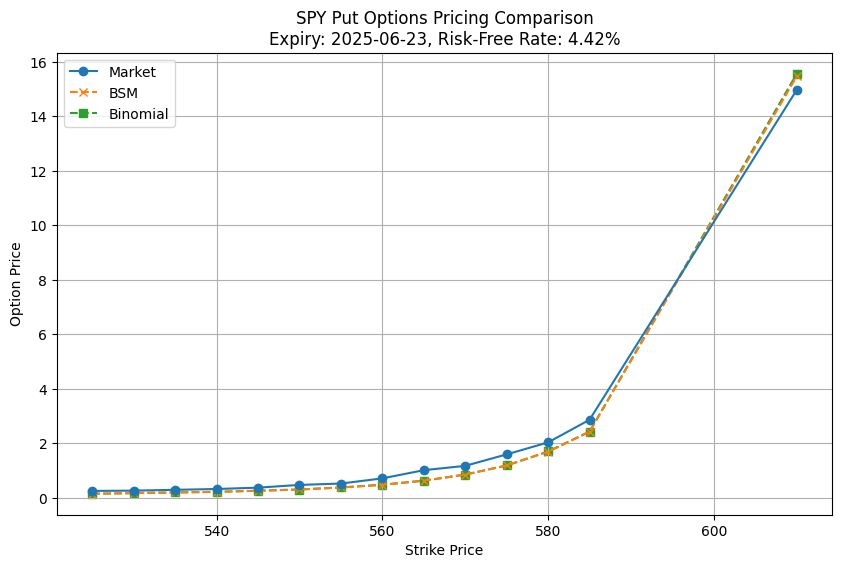

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,375.0,0.15,0.645511,0.117178,0.115396
1,380.0,0.13,0.633793,0.126282,0.123508
2,385.0,0.11,0.621098,0.134032,0.129773
3,390.0,0.16,0.610355,0.146235,0.143471
4,395.0,0.20,0.597660,0.154917,0.153086
...,...,...,...,...,...
62,612.0,14.04,0.151772,18.249275,18.522459
63,615.0,21.96,0.162179,21.000672,21.304070
64,620.0,25.70,0.165780,24.984826,25.355788
65,625.0,30.10,0.174264,29.396530,29.834814


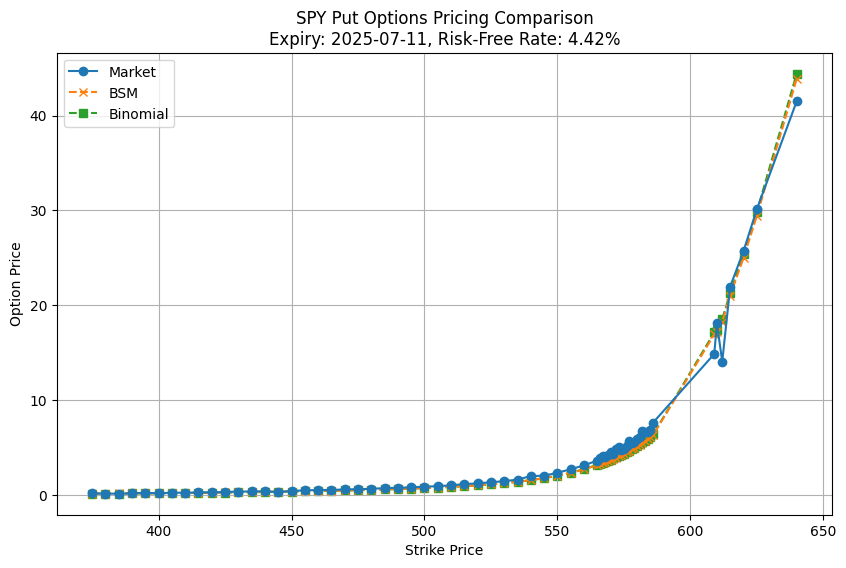

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,400.0,0.33,0.515142,0.298452,0.294610
1,415.0,0.28,0.486333,0.368746,0.367295
2,420.0,0.48,0.475103,0.385623,0.384135
3,430.0,0.52,0.455084,0.437266,0.429561
4,435.0,0.55,0.444830,0.463705,0.459586
5,440.0,0.53,0.435553,0.499191,0.498375
6,445.0,0.65,0.424688,0.524274,0.523527
7,450.0,0.69,0.415777,0.567693,0.563308
8,460.0,0.73,0.395148,0.637377,0.635593
9,465.0,0.81,0.385260,0.680232,0.680981


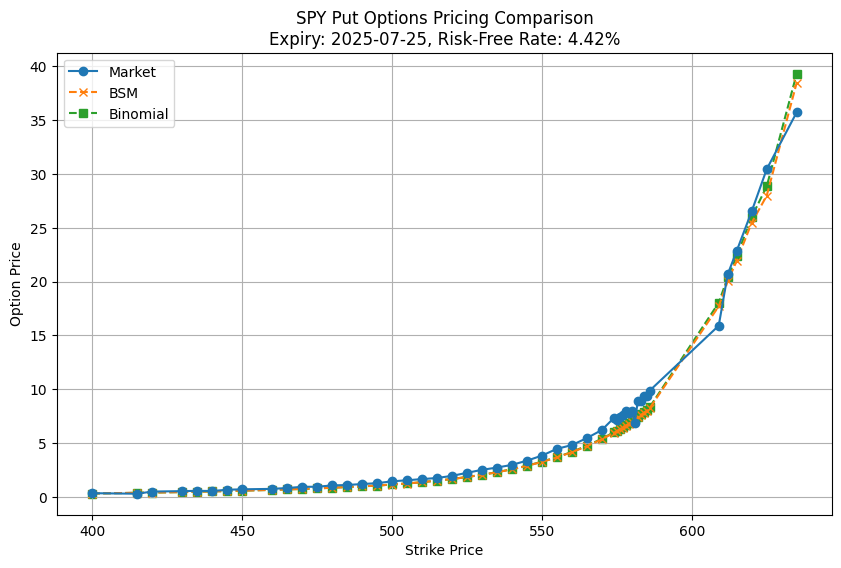

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,325.0,0.87,0.493657,0.735108,0.730303
1,330.0,0.88,0.485845,0.769177,0.768145
2,335.0,0.64,0.478033,0.803852,0.804499
3,340.0,0.97,0.470098,0.837654,0.837946
4,345.0,1.01,0.462164,0.871885,0.869916
...,...,...,...,...,...
57,630.0,36.00,0.131845,34.517312,36.457706
58,635.0,39.60,0.127999,37.717246,40.083220
59,640.0,42.60,0.125482,41.279346,44.123711
60,650.0,48.50,0.126306,49.474671,53.237775


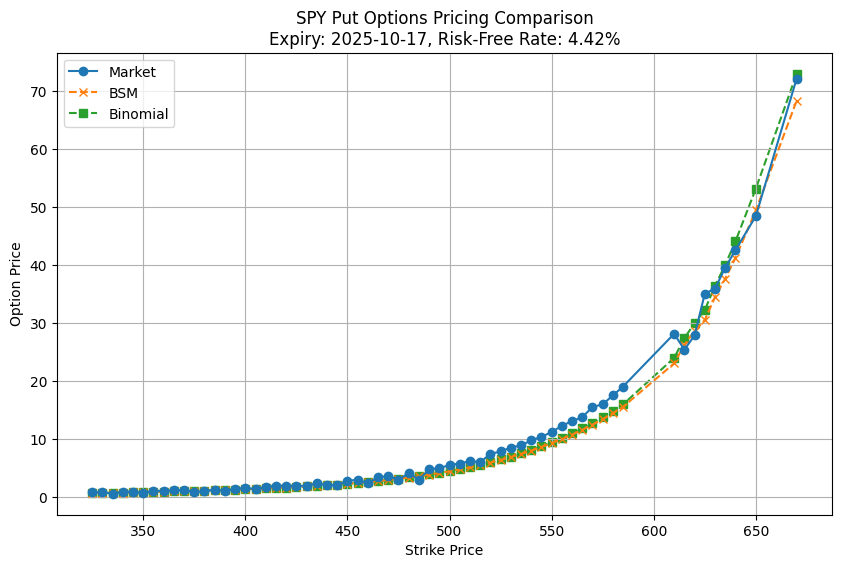

,Strike,Market Price,Implied Vol,Black-Scholes,Binomial
0,410.0,2.50,0.341132,2.116578,2.135476
1,420.0,2.74,0.329871,2.337863,2.342833
2,430.0,3.21,0.318916,2.590610,2.612993
3,440.0,3.61,0.308173,2.876851,2.904157
4,450.0,4.04,0.297828,3.211005,3.230532
...,...,...,...,...,...
71,620.0,32.39,0.141030,30.480842,32.166056
72,630.0,38.17,0.131433,35.364928,37.765897
73,640.0,52.18,0.122674,41.197721,44.667263
74,650.0,49.88,0.118203,48.384803,53.260032


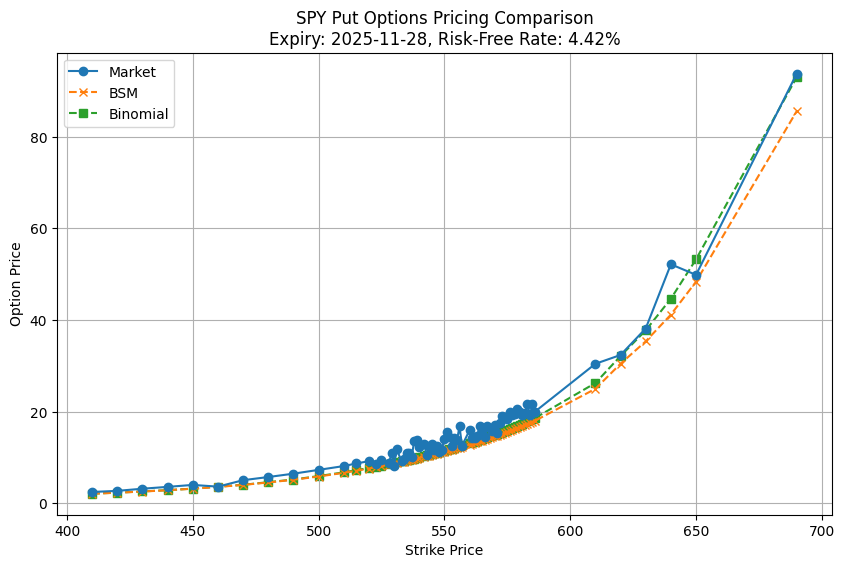

In [ ]:
ticker = 'SPY'
stock = yf.Ticker(ticker)

# Retrieve current 10-year US Treasury yield (as %)
yield_ticker = "^TNX"
yield_history = yf.Ticker(yield_ticker).history(period="1d")
latest_yield_pct = yield_history['Close'].iloc[-1]  # e.g., 35.5 = 3.55%
r = latest_yield_pct / 100
for i in range(1, 21, 2):
    try:
        expirations = stock.options
        chosen_expiry = expirations[i]
        opt_chain = stock.option_chain(chosen_expiry).puts

        # Current stock price & time to expiry
        S0 = stock.history(period="1d")['Close'].iloc[-1]
        expiry_date = datetime.strptime(chosen_expiry, "%Y-%m-%d").date()
        T = (expiry_date - date.today()).days / 365.25
        # Focus on near-the-money options (±$10 of S)
        otm_options = opt_chain[abs(opt_chain['strike'] - S0) > 10].copy()

        # Drop options with missing implied volatilities or prices
        otm_options = otm_options.dropna(subset=['impliedVolatility', 'lastPrice'])

        # Dividend Yield
        q = stock.info.get('dividendYield', 0) / 100

        results = []
        for _, row in otm_options.iterrows():
            K = row['strike']
            sigma = row['impliedVolatility']
            market_price = row['lastPrice']
            bsm_price = BlackScholesOptionPricer(S0, K, T, r, sigma, q)
            bin_price = BinomialOptionPricer(S0, K, T, r, sigma, q, 200)
            results.append({
                "Strike": K,
                "Market Price": market_price,
                "Implied Vol": sigma,
                "Black-Scholes": bsm_price.price_european_put()['option_price'],
                "Binomial": bin_price.price_american_option('put')['option_price']
            })

        df_comparison = pd.DataFrame(results).sort_values(by="Strike")

        # --- Display Results ---
        display(df_comparison)

        # --- Plot Results ---
        plt.figure(figsize=(10, 6))
        plt.plot(df_comparison['Strike'], df_comparison['Market Price'], 'o-', label='Market', zorder=3)
        plt.plot(df_comparison['Strike'], df_comparison['Black-Scholes'], 'x--', label='BSM', zorder=2)
        plt.plot(df_comparison['Strike'], df_comparison['Binomial'], 's--', label='Binomial', zorder=1)
        plt.xlabel("Strike Price")
        plt.ylabel("Option Price")
        plt.title(f"{ticker} Put Options Pricing Comparison\nExpiry: {chosen_expiry}, Risk-Free Rate: {r * 100:.2f}%")
        plt.grid(True)
        plt.legend()
        plt.show()
    except:
        pass


# Conclusions from market comparison
- Call options priced very close to market prices (when Time to Expiration increases yFinance gives bad Volatility data resulting in those bad graphs)
- Put options priced lower than market price due to the options being considered being american options which are by default of higher value than european options (binomial tree options are still lower due to data problems)
- Market options are also sometime not uniform (probably due to other factors(real-world)) but these are not reflected in our models

# Conclusions: When to Prefer Black-Scholes vs. Binomial for European Options
1. Black-Scholes Model is Preferable When:

    - Options are near-the-money and short-dated:

        The Black-Scholes model works especially well for European options close to the current spot price and with short to
        moderate time to expiration.
    - Volatility is assumed constant:

        If the implied volatility is relatively flat across strikes and maturities, Black-Scholes provides accurate, analytical results efficiently.

    - Speed and simplicity are needed:

        It is computationally faster due to its closed-form solution, making it suitable for real-time pricing and risk analytics.

2. Binomial Model is Preferable When:

    - Higher precision is needed for complex payoffs:

        With enough time steps, the Binomial model can better approximate path-dependent payoffs, discrete dividends, or custom contract features — even for European options.

    - Modeling discrete events or volatility structure:

        It allows more flexibility in incorporating changing volatility, interest rates, or dividend schedules.

    - Longer maturities:

        For long-dated options, the numerical step-wise construction of the Binomial model provides more stable results than relying on a single average volatility estimate.
